In [1]:
import sys ; sys.path.insert(0, '../')
from notebook_tools import *
%matplotlib inline

In [2]:
figures_path="/Users/erezcohen/Desktop/DataMining/alaHallAppSRCAnalysisNote/Figures/sigma_t_correction/"

# pp-SRC c.m. analysis

In [3]:
columns = ['Pmiss3Mag','pcmX','pcmY','pcmZ','rooWeight','Mott','DipoleFF2']
data_allPmiss , data300Pmiss600 = dict() , dict()
for target in ['C12','Al27','Fe56','Pb208']:
    data_allPmiss[target] = read_root( path+"/OrAnalysisTrees/AdjustedTrees/SRC_e2p_adjusted_%s_noFiducials.root"%target, columns=columns )
    data300Pmiss600[target] = data_allPmiss[target][data_allPmiss[target]['Pmiss3Mag']<0.6]
    data300Pmiss600[target]['Mott*DipoleFF2']=data300Pmiss600[target]['Mott']*data300Pmiss600[target]['DipoleFF2']

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


saved /Users/erezcohen/Desktop/DataMining/alaHallAppSRCAnalysisNote/Figures/sigma_t_correction/MeasuredDistributions/MeasuredDistributionC12.pdf
saved /Users/erezcohen/Desktop/DataMining/alaHallAppSRCAnalysisNote/Figures/sigma_t_correction/MeasuredDistributions/MeasuredDistributionAl27.pdf
saved /Users/erezcohen/Desktop/DataMining/alaHallAppSRCAnalysisNote/Figures/sigma_t_correction/MeasuredDistributions/MeasuredDistributionFe56.pdf
saved /Users/erezcohen/Desktop/DataMining/alaHallAppSRCAnalysisNote/Figures/sigma_t_correction/MeasuredDistributions/MeasuredDistributionPb208.pdf


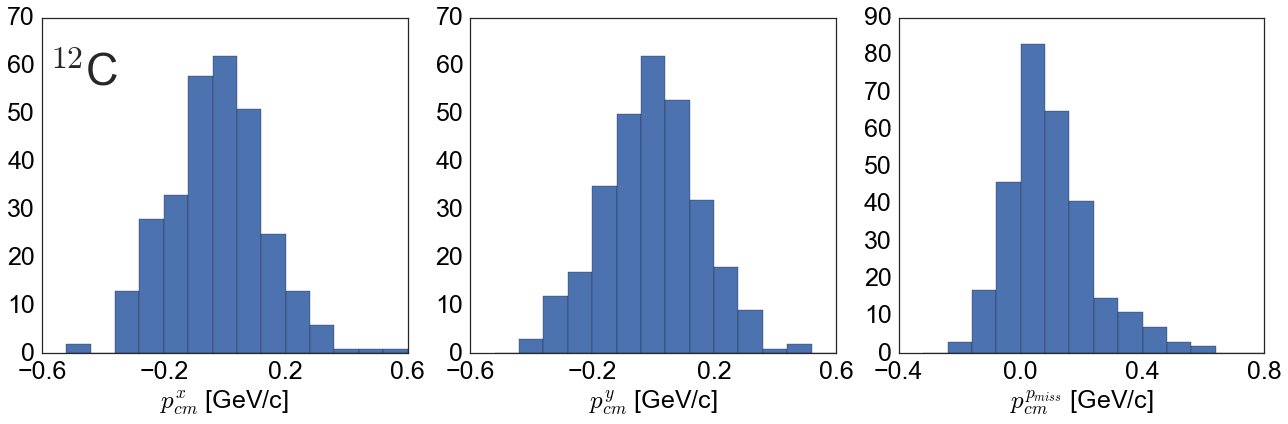

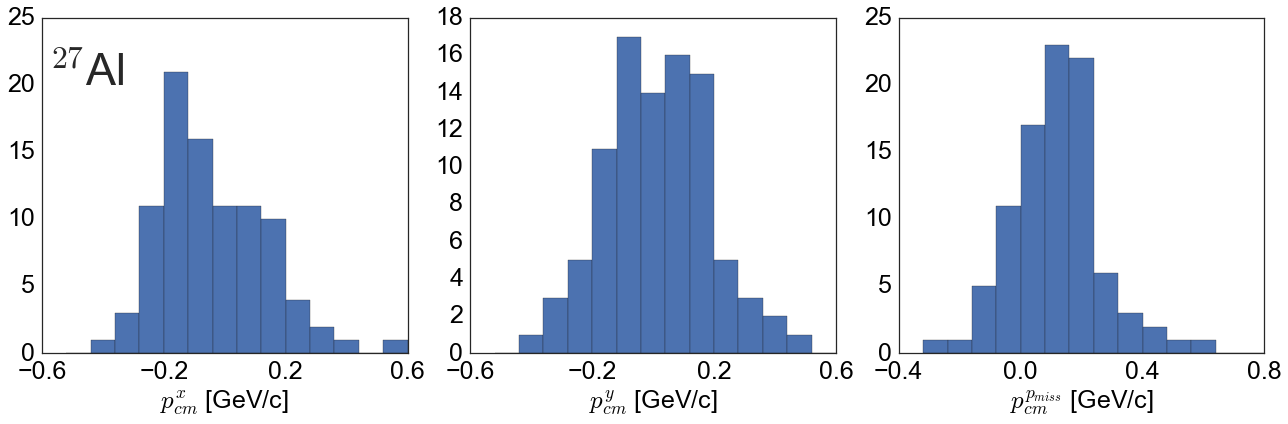

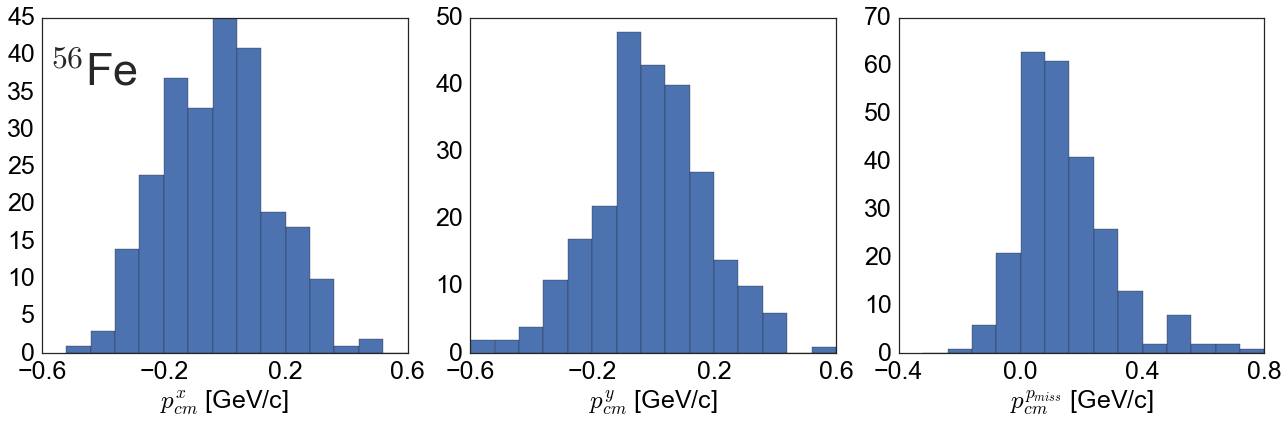

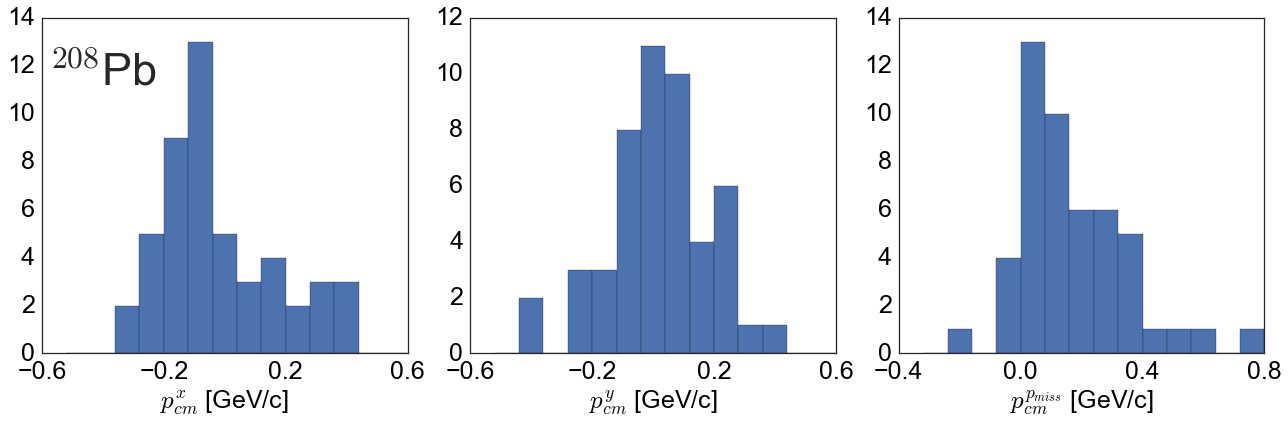

In [4]:
for target,name in zip(['C12','Al27','Fe56','Pb208']
                       ,['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']):
    weight_name = ''
    fig=plt.figure(figsize=(18,6))
    for i,(direction,label) in enumerate(zip(['X','Y','Z']                                        
                                             ,['x','y','p_{miss}'])):
        ax=fig.add_subplot(1,3,i+1)
        x = data300Pmiss600[target]['pcm'+direction]
        xmin = -0.6 if i<2 else -0.4       
        xmax = 0.6 if i<2 else 0.8
        if weight_name != '':
            weights = 1./data300Pmiss600[target][weight_name]
        else: weights=None
        plt.hist( x,  weights=weights , bins=np.linspace(xmin,xmax,16))
        mean = np.average(x , weights=weights)
        sigma = np.sqrt(np.average( np.square(x-mean) , weights=weights))
        set_axes(ax,'$p_{cm}^{%s}$ [GeV/c]'%label,
                 xticks=np.linspace(xmin,xmax,4)
#                  ,title='$\\mu_{%s}=%.3f, \\sigma_{%s}=%.3f$ GeV/c'%(label,mean,label,sigma)
                )
        ax.set_xlim(xmin,xmax)
        if direction=='X': 
            plt.text( xmin+0.02*(xmax-xmin), 0.8*np.max(ax.get_ylim()), name , fontsize=45)
    plt.tight_layout()
    outfilename = figures_path+'MeasuredDistributions/MeasuredDistribution'+target+'.pdf' 
    print 'saved ' + outfilename
    plt.savefig(outfilename)

In [5]:
cm_pars = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/300Pmiss600/alltargets_dataCMparameters.csv')
cm_pars['sigma_t'] = 0.5*(cm_pars['sigma_x_unweighted']+cm_pars['sigma_y_unweighted'])
cm_pars['sigma_tErr_Or'] = 1./np.sqrt( 1./np.square(cm_pars['sigma_xErr_unweighted']) + 1./np.square(cm_pars['sigma_yErr_unweighted']) )
cm_pars['sigma_tErr'] = 0.5*np.sqrt( np.square(cm_pars['sigma_xErr_unweighted']) + np.square(cm_pars['sigma_yErr_unweighted']) )

cm_pars['sigma_t_weighted'] = 0.5*(cm_pars['sigma_x_weighted']+cm_pars['sigma_y_weighted'])
cm_pars['sigma_tErr_weighted'] = 1./np.sqrt( 1./np.square(cm_pars['sigma_xErr_weighted']) + 1./np.square(cm_pars['sigma_yErr_weighted']) )

cm_pars_with_correction = cm_pars

In [6]:
cm_pars_allPmiss = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/OrDataTrees/alltargets_dataCMparameters.csv')
cm_pars_allPmiss['sigma_t'] = 0.5*(cm_pars_allPmiss['sigma_x_unweighted']+cm_pars_allPmiss['sigma_y_unweighted'])
cm_pars_allPmiss['sigma_tErr'] = 0.5*np.sqrt( np.square(cm_pars_allPmiss['sigma_xErr_unweighted']) + np.square(cm_pars_allPmiss['sigma_yErr_unweighted']) )

In [7]:
cm_fits_allPmiss_12C = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/dataCMfitsC12.csv')
cm_fits_allPmiss_12C[['SigmaX','SigmaXerr','SigmaY','SigmaYerr']]

SigmaX  SigmaXerr    SigmaY  SigmaYerr
0  0.168395   0.010563  0.168648   0.012486

In [8]:
cm_fits_allPmiss_27Al = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/dataCMfitsAl27.csv')
cm_fits_allPmiss_27Al[['SigmaX','SigmaXerr','SigmaY','SigmaYerr']]

SigmaX  SigmaXerr    SigmaY  SigmaYerr
0  0.164223   0.020714  0.183775   0.021751

In [9]:
cm_fits_allPmiss_56Fe = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/dataCMfitsFe56.csv')
cm_fits_allPmiss_56Fe[['SigmaX','SigmaXerr','SigmaY','SigmaYerr']]

SigmaX  SigmaXerr   SigmaY  SigmaYerr
0  0.172718   0.010729  0.18616   0.015677

In [10]:
cm_fits_allPmiss_208Pb = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/dataCMfitsPb208.csv')
cm_fits_allPmiss_208Pb[['SigmaX','SigmaXerr','SigmaY','SigmaYerr']]

SigmaX  SigmaXerr    SigmaY  SigmaYerr
0  0.186669   0.009371  0.173923   0.009619

In [11]:
cm_pars_allPmiss[['target','Nevts','sigma_x_unweighted','sigma_xErr_unweighted','sigma_y_unweighted','sigma_yErr_unweighted']]

target  Nevts  sigma_x_unweighted  sigma_xErr_unweighted  \
0    $^{12}$C    504            0.167565               0.005278   
1   $^{27}$Al    175            0.163716               0.008752   
2   $^{56}$Fe    475            0.170876               0.005544   
3  $^{208}$Pb    108            0.185358               0.012606   

   sigma_y_unweighted  sigma_yErr_unweighted  
0            0.168092               0.005294  
1            0.188206               0.010063  
2            0.186734               0.006056  
3            0.175894               0.011965

In [12]:
cm_pars[['target','Nevts','sigma_x_unweighted','sigma_xErr_unweighted','sigma_y_unweighted','sigma_yErr_unweighted','sigma_z_unweighted','sigma_zErr_unweighted','mean_x_unweighted','mean_xErr_unweighted','mean_y_unweighted','mean_yErr_unweighted','mean_z_unweighted','mean_zErr_unweighted']]

target  Nevts  sigma_x_unweighted  sigma_xErr_unweighted  \
0    $^{12}$C    294            0.154505               0.006371   
1   $^{27}$Al     93            0.183751               0.013470   
2   $^{56}$Fe    247            0.175548               0.007898   
3  $^{208}$Pb     49            0.190268               0.019198   

   sigma_y_unweighted  sigma_yErr_unweighted  sigma_z_unweighted  \
0            0.159606               0.006581            0.146657   
1            0.171708               0.012577            0.142934   
2            0.185311               0.008333            0.153174   
3            0.160862               0.016236            0.167473   

   sigma_zErr_unweighted  mean_x_unweighted  mean_xErr_unweighted  \
0               0.006048          -0.026041              0.009011   
1               0.010477          -0.033282              0.019052   
2               0.006890          -0.023499              0.011169   
3               0.016885          -0.020898              0.027176   

   mean_y_unweighted  mean_yErr_unweighted  mean_z_unweighted  \
0          -0.006231              0.009308           0.101342   
1           0.014392              0.017804           0.119551   
2          -0.006298              0.011791           0.147188   
3           0.016871              0.022977           0.165872   

   mean_zErr_unweighted  
0              0.008553  
1              0.014821  
2              0.009746  
3              0.023920

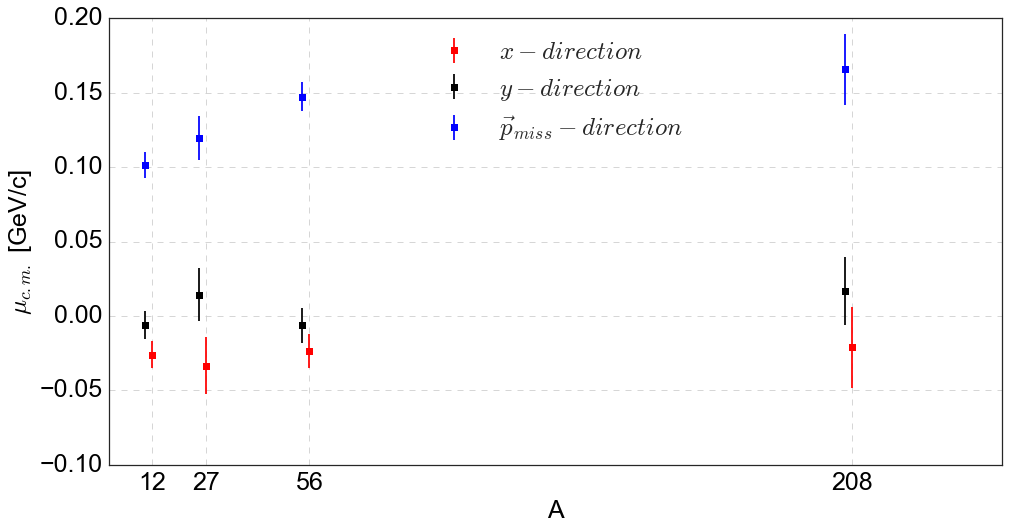

In [13]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
ax.errorbar(x=cm_pars['A'],y=cm_pars['mean_x_unweighted'],yerr=cm_pars['mean_xErr_unweighted'],fmt='s',color='red',label='$x-direction$')
ax.errorbar(x=cm_pars['A']-2,y=cm_pars['mean_y_unweighted'],yerr=cm_pars['mean_yErr_unweighted'],fmt='s',color='black',label='$y-direction$')
ax.errorbar(x=cm_pars['A']-2,y=cm_pars['mean_z_unweighted'],yerr=cm_pars['mean_zErr_unweighted'],fmt='s',color='blue',label='$\\vec{p}_{miss}-direction$')
set_axes(ax,'A','$\\mu_{c.m.}$ [GeV/c]')
ax.xaxis.set_ticks([12,27,56,208])
ax.grid(linestyle='--',alpha=0.8)
ax.legend(fontsize=25,loc='upper center')
outfilename = figures_path + 'mean_cm_Adependence.pdf'
plt.savefig(outfilename)

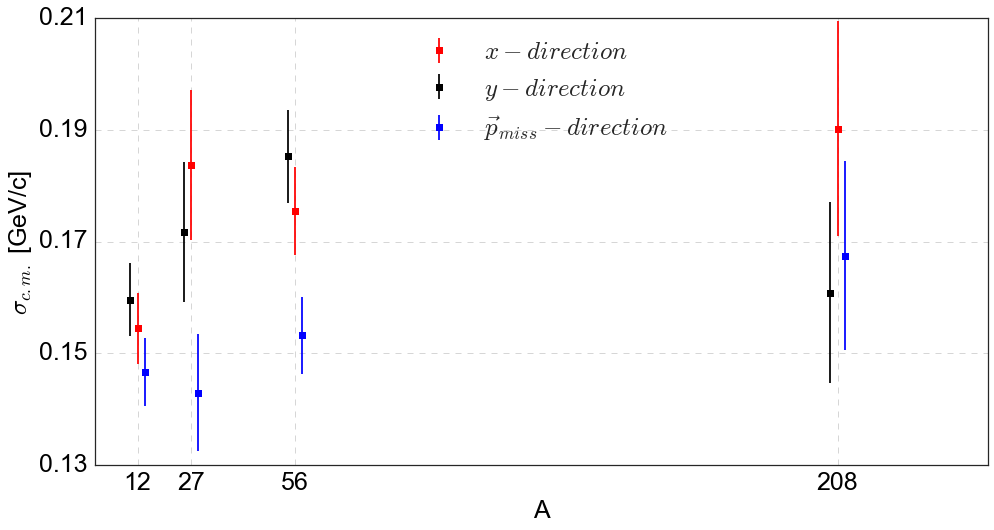

In [14]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
ax.errorbar(x=cm_pars['A'],y=cm_pars['sigma_x_unweighted'],yerr=cm_pars['sigma_xErr_unweighted'],fmt='s',color='red',label='$x-direction$')
ax.errorbar(x=cm_pars['A']-2,y=cm_pars['sigma_y_unweighted'],yerr=cm_pars['sigma_yErr_unweighted'],fmt='s',color='black',label='$y-direction$')
ax.errorbar(x=cm_pars['A']+2,y=cm_pars['sigma_z_unweighted'],yerr=cm_pars['sigma_zErr_unweighted'],fmt='s',color='blue',label='$\\vec{p}_{miss}-direction$')
set_axes(ax,'A','$\\sigma_{c.m.}$ [GeV/c]')
ax.xaxis.set_ticks([12,27,56,208]);ax.yaxis.set_ticks([0.13,0.15,0.17,0.19,0.21]);
ax.grid(linestyle='--',alpha=0.8)
ax.legend(fontsize=25,loc='upper center')
outfilename = figures_path + 'sigma_cm_Adependence.pdf'
plt.savefig(outfilename)

In [15]:
simulation_results = dict()
test_names = []
start_run , end_run = 0 , 100
for target,target_name,mean_z,mean_z_err,sigma_z,sigma_z_err in zip(['C12','Al27','Fe56','Pb208']
                                                                    ,['C','Al','Fe','Pb']                                                                 
                                                                    # measured \mu(miss)
                                                                    ,[0.100,0.119,0.147,0.166]
                                                                    ,[0.008,0.015,0.010,0.023]
                                                                    # measured \sigma(miss)
                                                                    ,[0.146,0.143,0.153,0.167]
                                                                    ,[0.006,0.010,0.007,0.017]
                                                                   ):#{
        for gen_mean_z in [ mean_z-mean_z_err , mean_z , mean_z+mean_z_err ]:#{
            for gen_sigma_z in [ sigma_z-sigma_z_err , sigma_z , sigma_z+sigma_z_err ]:#{
#                 print_important( "grabbing "+target_name+"(e,e'p) and simulating with mean(z)=%.3f"%gen_mean_z+" and sigma(z)=%.3f"%    gen_sigma_z )            
                test_name = 'simulation_300Pmiss600_%s_genMeanZ_%.3f_genSigmaZ_%.3f_%d_%d'%( target_name
                                                                                            , gen_mean_z
                                                                                            , gen_sigma_z
                                                                                            , start_run
                                                                                            , end_run)
                test_names.append(test_name)
                filename = "/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation_300Pmiss600/"+test_name+'runs_results.csv'
                simulation_results[test_name]=pd.read_csv(filename)
                print len(simulation_results[test_name]),'events in ',test_name

100 events in  simulation_300Pmiss600_C_genMeanZ_0.092_genSigmaZ_0.140_0_100
100 events in  simulation_300Pmiss600_C_genMeanZ_0.092_genSigmaZ_0.146_0_100
100 events in  simulation_300Pmiss600_C_genMeanZ_0.092_genSigmaZ_0.152_0_100
100 events in  simulation_300Pmiss600_C_genMeanZ_0.100_genSigmaZ_0.140_0_100
100 events in  simulation_300Pmiss600_C_genMeanZ_0.100_genSigmaZ_0.146_0_100
100 events in  simulation_300Pmiss600_C_genMeanZ_0.100_genSigmaZ_0.152_0_100
100 events in  simulation_300Pmiss600_C_genMeanZ_0.108_genSigmaZ_0.140_0_100
100 events in  simulation_300Pmiss600_C_genMeanZ_0.108_genSigmaZ_0.146_0_100
100 events in  simulation_300Pmiss600_C_genMeanZ_0.108_genSigmaZ_0.152_0_100
100 events in  simulation_300Pmiss600_Al_genMeanZ_0.104_genSigmaZ_0.133_0_100
100 events in  simulation_300Pmiss600_Al_genMeanZ_0.104_genSigmaZ_0.143_0_100
100 events in  simulation_300Pmiss600_Al_genMeanZ_0.104_genSigmaZ_0.153_0_100
100 events in  simulation_300Pmiss600_Al_genMeanZ_0.119_genSigmaZ_0.133_0

In [16]:
def find_x_poly(poly,y0,xmin=0,xmax=0.3):
    p = np.poly1d(poly)
    roots = (p - y0).roots
    for root in roots:
        if xmin<root and root<xmax:
            x_poly = root
    return x_poly

In [17]:
def plot_cm_direction(simulations_results=None,name='',ax=None,A=12,direction='x',colors=['blue','royalblue'],s=50):

    gen,rec = simulations_results['gen_Sigma_t'],simulations_results['rec_sigma_'+direction]
    plt.scatter(gen,rec,color=colors[1],label='generated vs. reconstructed',s=s)
    
    # fit a polynomial of order 2
    popt,cov = np.polyfit( gen, rec , 3 , cov=True)
    # print popt , np.sqrt(cov[0][0]) , np.sqrt(cov[1][1]) , np.sqrt(cov[2][2])


    x = np.linspace(np.min(ax.get_xlim()),np.max(ax.get_xlim()),1000)
    poly = np.poly1d(popt)
    ax.plot(x,poly(x),'-',color='black',linewidth=2,label='best fit')

    cm_pars_target = cm_pars[cm_pars['A']==A]
    index = cm_pars[cm_pars['A']==A].index
#     print 'index:',index
    
    # reconstructed \sigma in data
    sigma_meas, sigma_meas_err = float(cm_pars_target['sigma_'+direction+'_unweighted']), float(cm_pars_target['sigma_'+direction+'Err_unweighted'])
    y =  np.ones(len(x)) * sigma_meas
    yErr =  np.ones(len(x)) * sigma_meas_err
    x_poly = find_x_poly(poly,sigma_meas)
    x_poly_up = find_x_poly(poly,sigma_meas+sigma_meas_err)
    x_poly_down = find_x_poly(poly,sigma_meas-sigma_meas_err)
    x_poly_err = np.average([x_poly_up-x_poly,x_poly-x_poly_down])
    
    plt.plot( np.linspace(np.min(ax.get_xlim()),x_poly,1000) , y , color=colors[1],label='measured: $%.3f\\pm%.3f$'%(sigma_meas, sigma_meas_err))
    plt.plot( np.linspace(np.min(ax.get_xlim()),x_poly_up,1000) , y+yErr , color=colors[1],linestyle='--')
    plt.plot( np.linspace(np.min(ax.get_xlim()),x_poly_down,1000) , y-yErr , color=colors[1],linestyle='--')
    
    # project to generated
    plt.plot( [x_poly,x_poly] , [np.min(ax.get_ylim()),sigma_meas] , color=colors[0],label='corrected: $%.3f \\pm %.3f$'%(x_poly, x_poly_err))
    plt.plot( [x_poly_up,x_poly_up] , [np.min(ax.get_ylim()),sigma_meas+sigma_meas_err] , color=colors[0] ,linestyle='--')
    plt.plot( [x_poly_down,x_poly_down] , [np.min(ax.get_ylim()),sigma_meas-sigma_meas_err] , color=colors[0] ,linestyle='--' )
    corr_value, corr_value_err = x_poly , x_poly_err
    
    cm_pars_with_correction.set_value(index,'sigma_'+direction+'_corrected'+'_'+name,corr_value)
    cm_pars_with_correction.set_value(index,'sigma_'+direction+'Err_corrected'+'_'+name,corr_value_err)
    
    set_axes(ax,'gen. $\\sigma$ [GeV/c]','rec. $\\sigma_'+direction+'$ [GeV/c]'    
             , xticks=[0,0.05,0.1,0.15,0.2,0.25,0.3] , yticks=[0,0.05,0.1,0.15,0.2,0.25,0.3] , do_add_grid=True 
             ,title = name+'GeV/c, '+cm_pars_target['target'].to_string(index=False) + ', $'+direction+'-direction$')

    ax.legend(loc='upper left',fontsize=20,scatterpoints=3)
    ax.set_xlim(0,0.3);ax.set_ylim(0,0.3);
    return corr_value, corr_value_err

/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


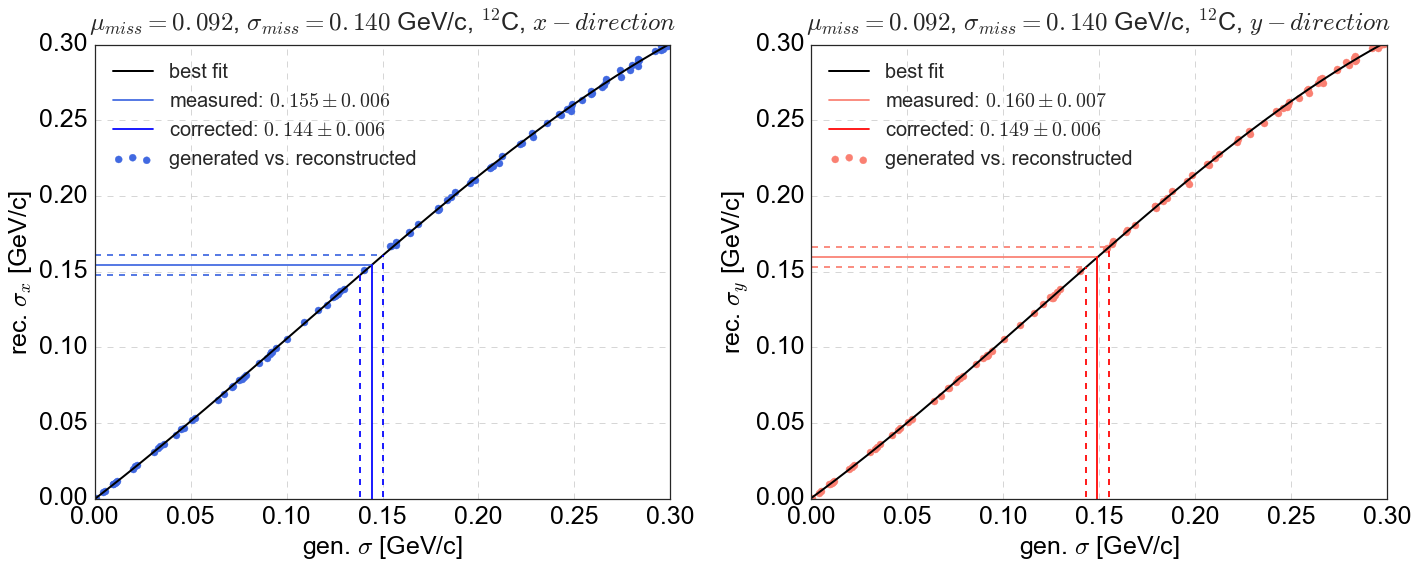

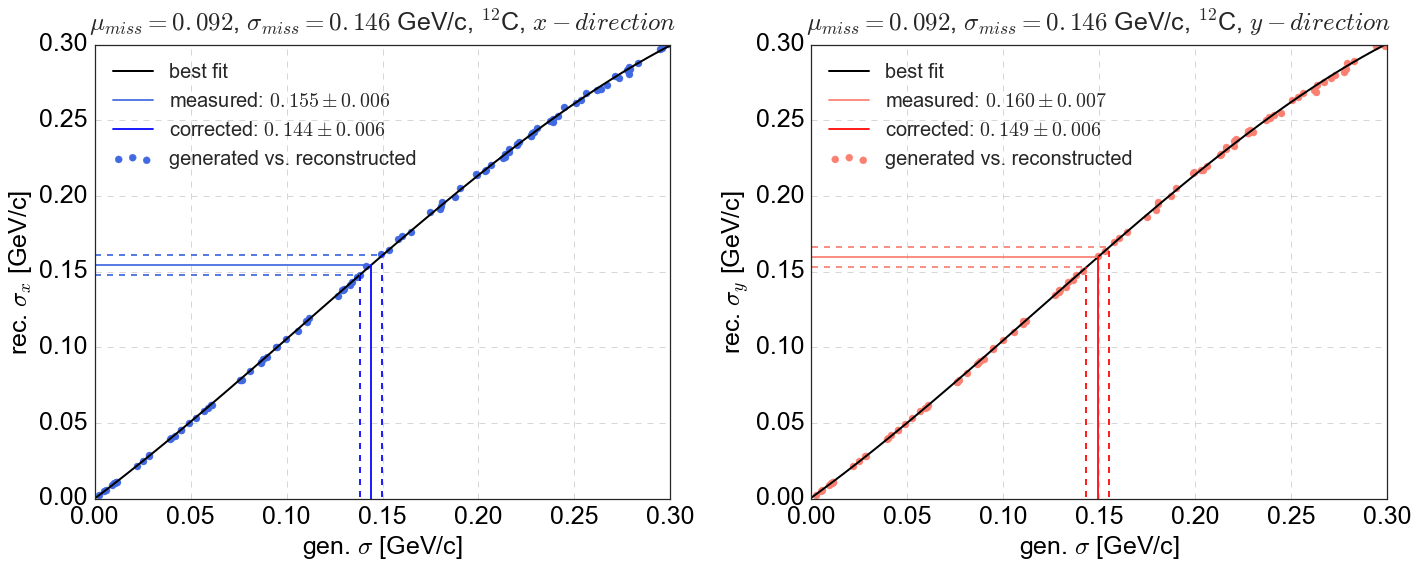

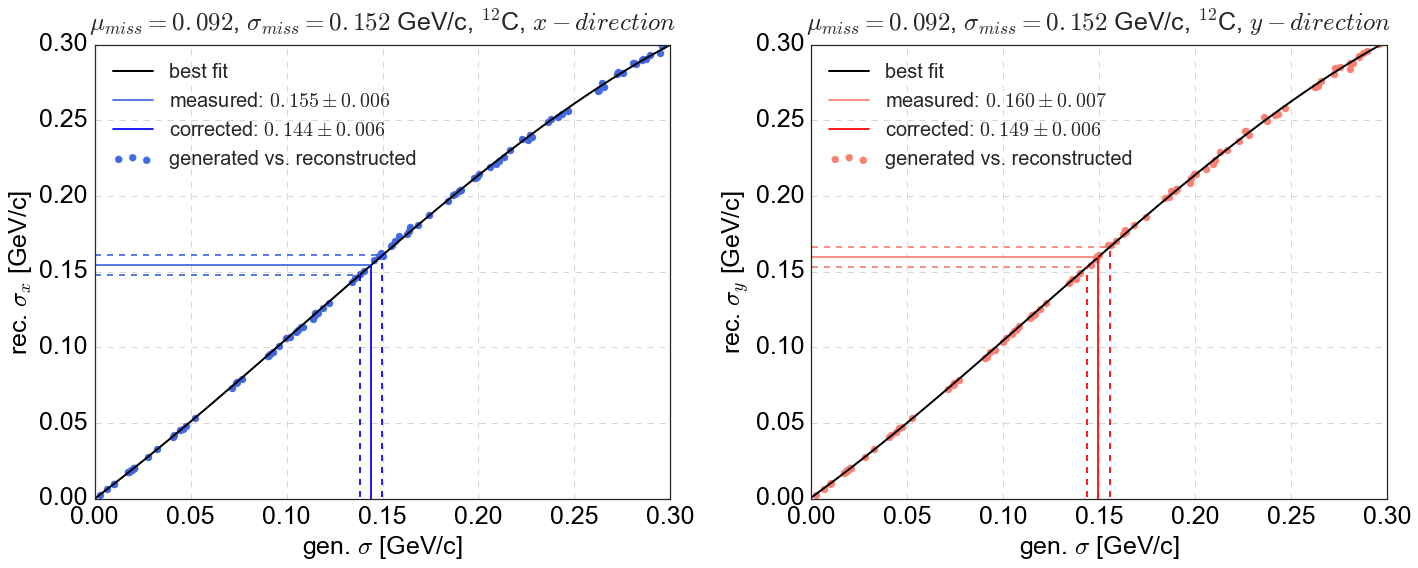

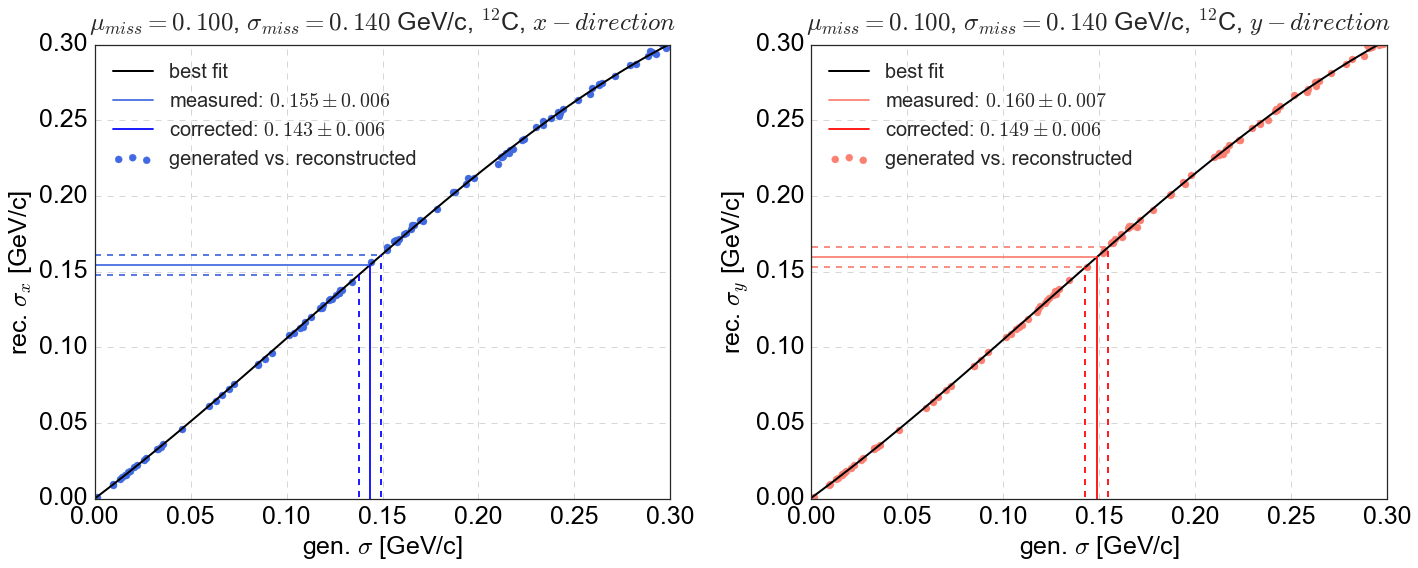

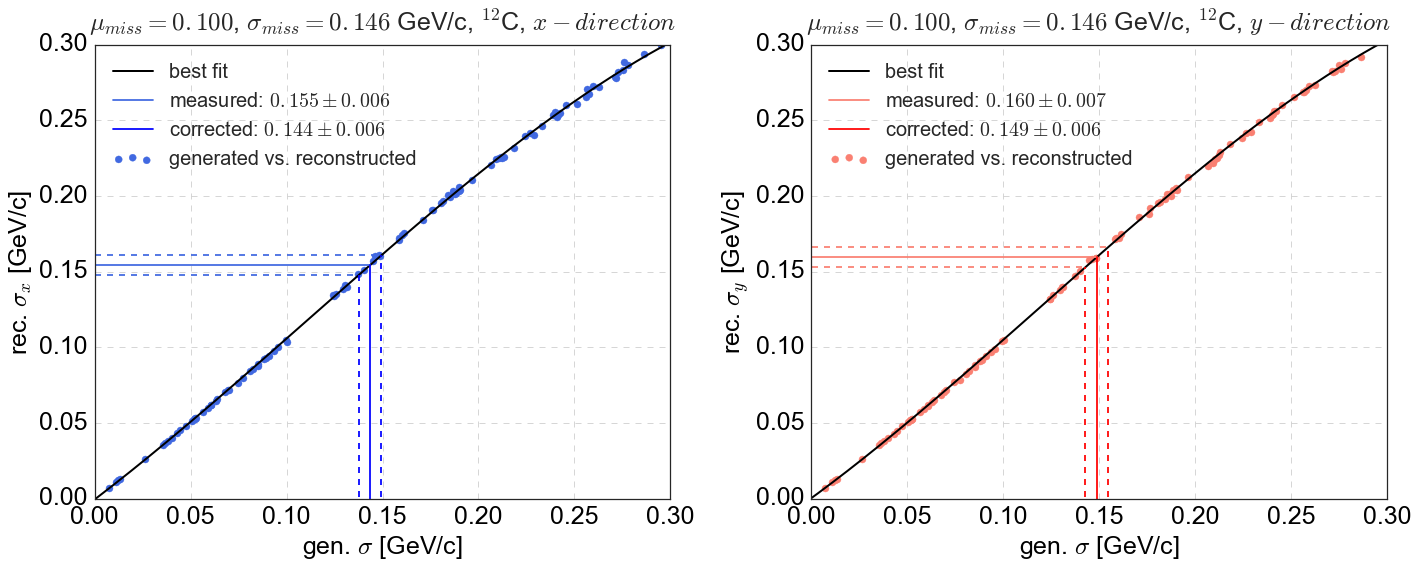

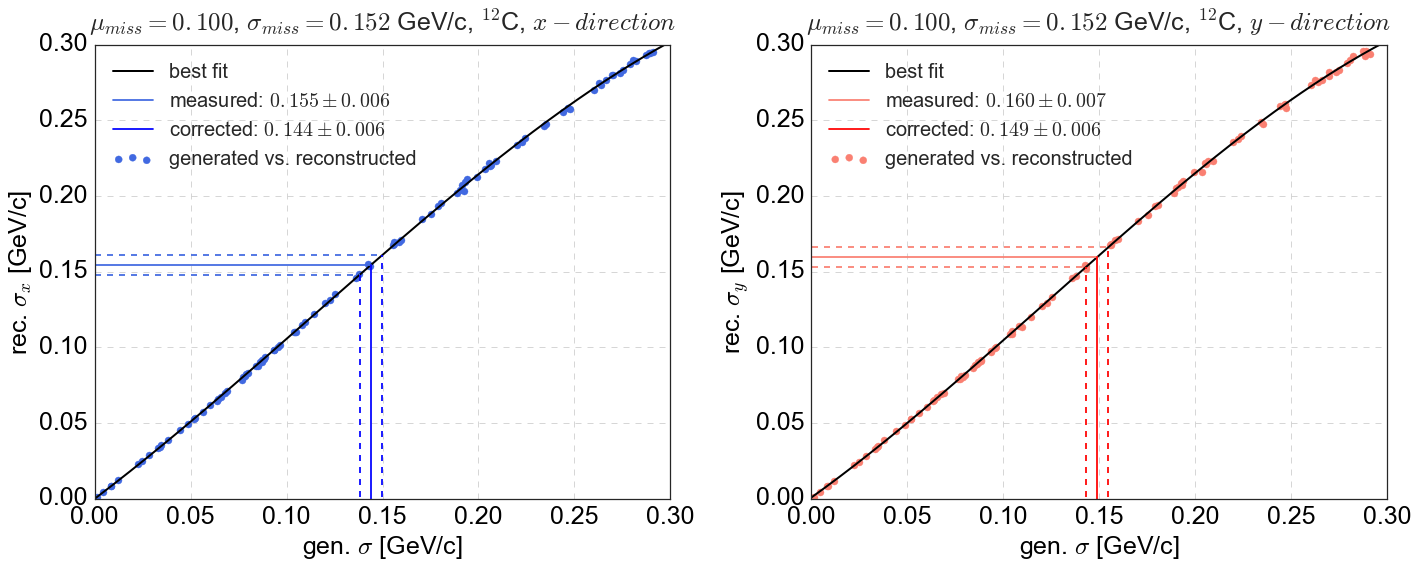

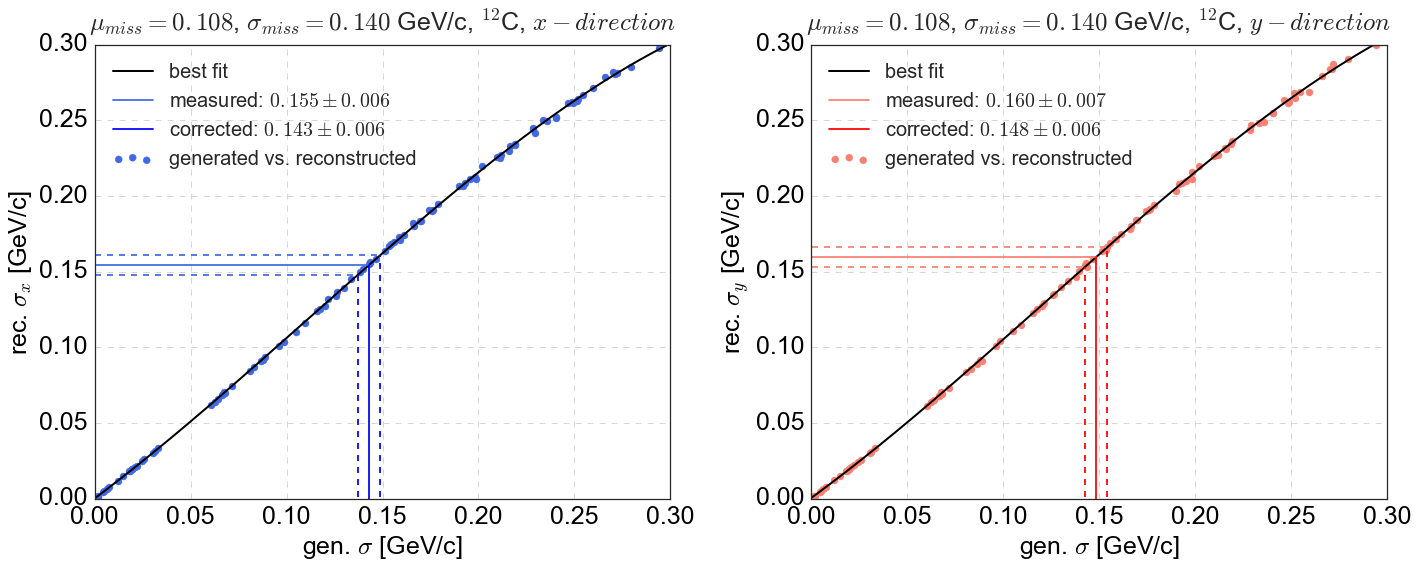

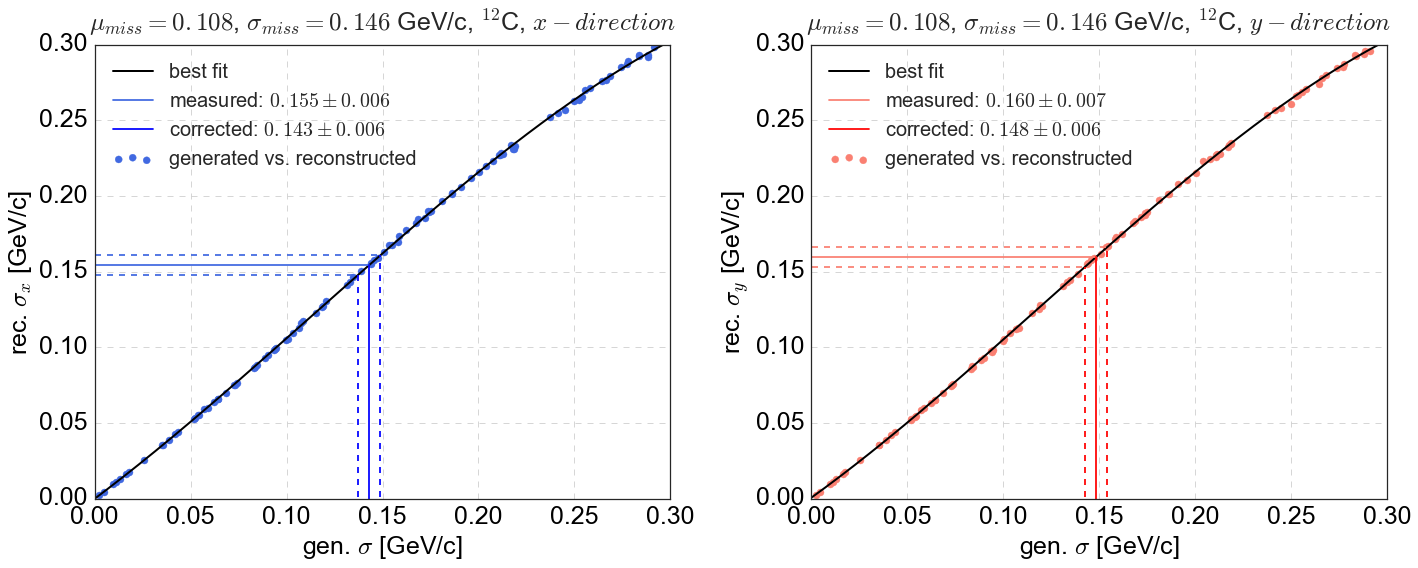

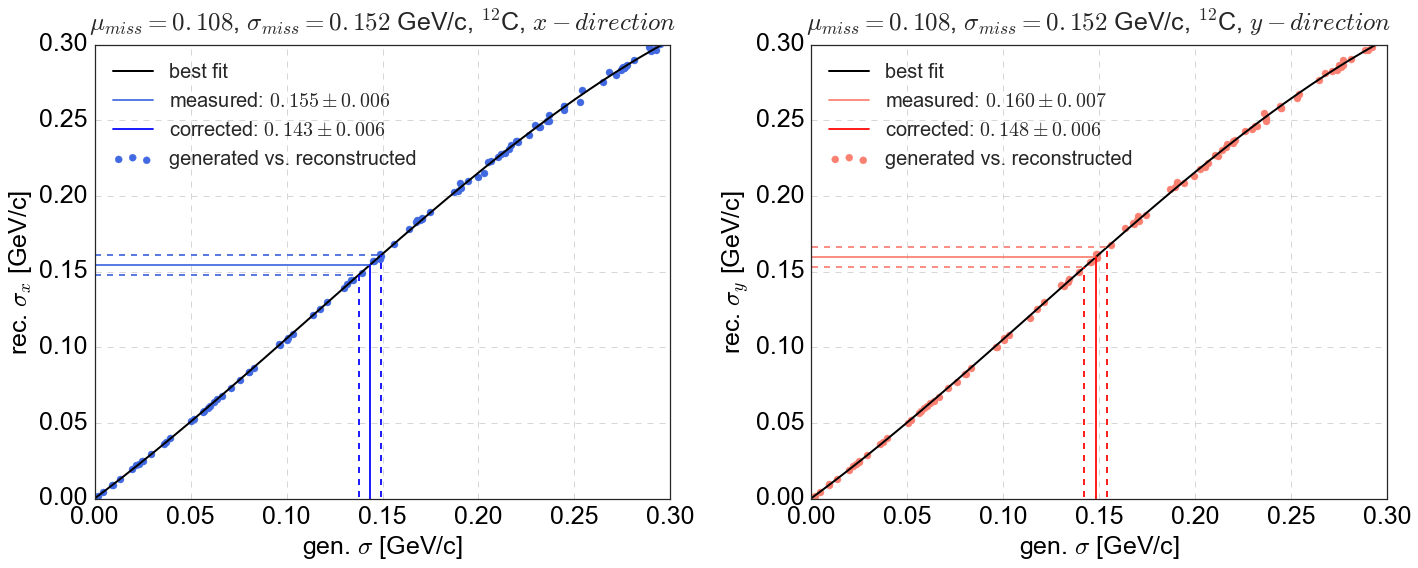

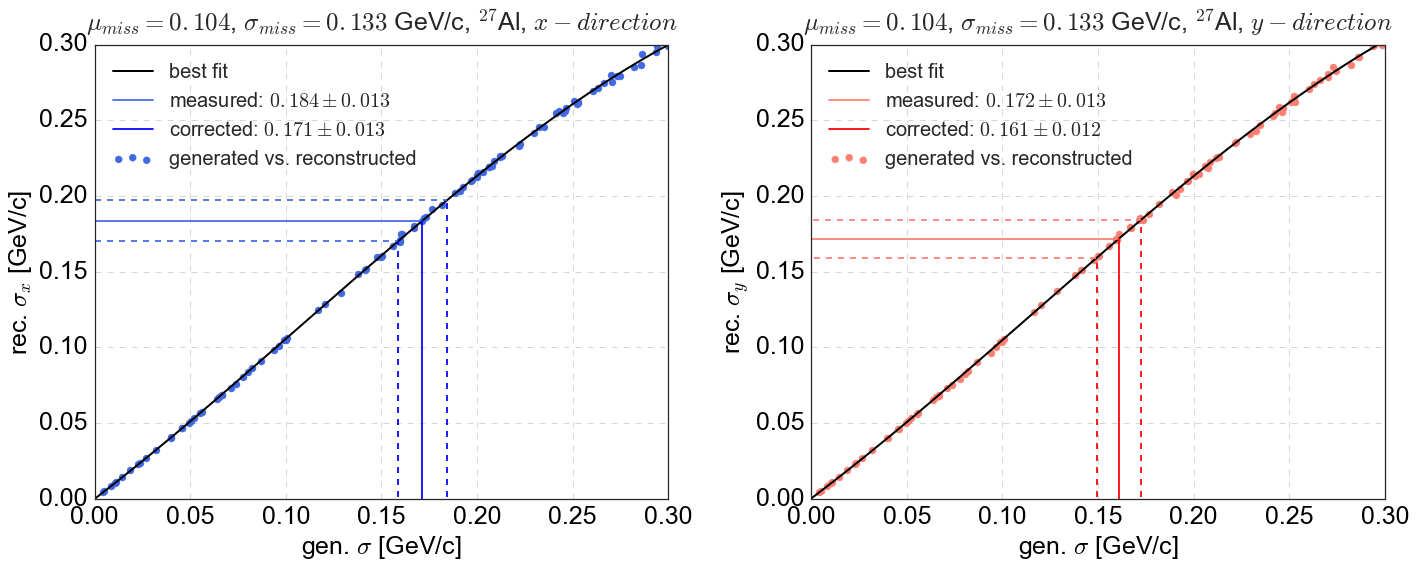

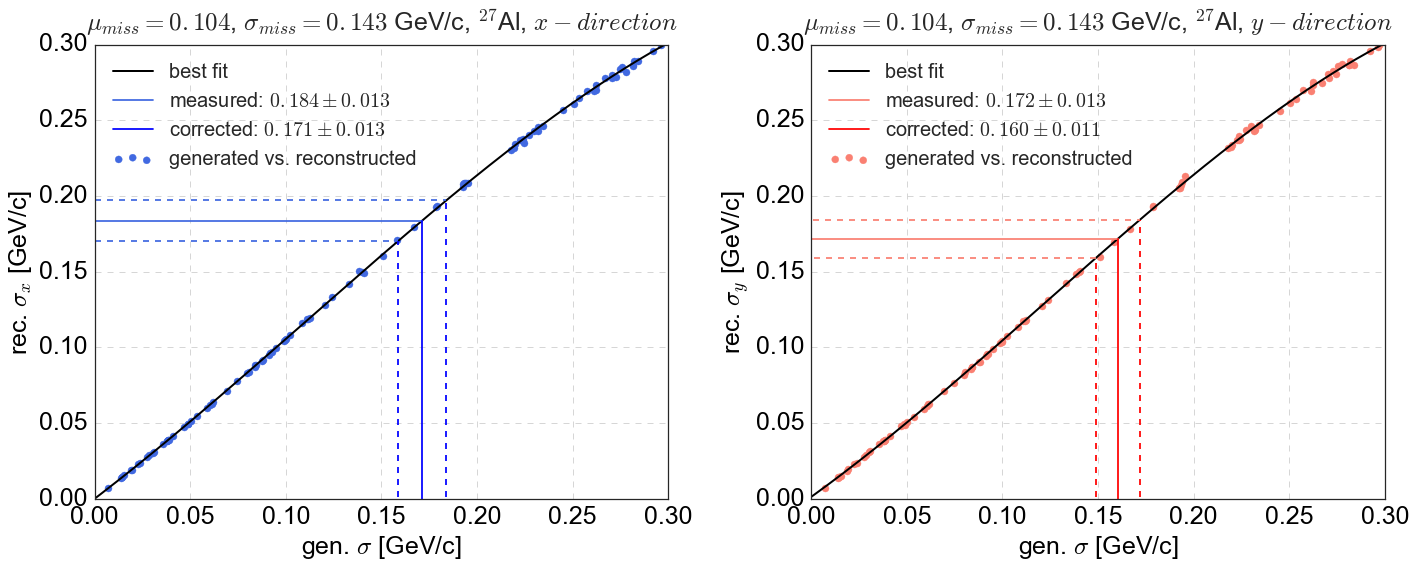

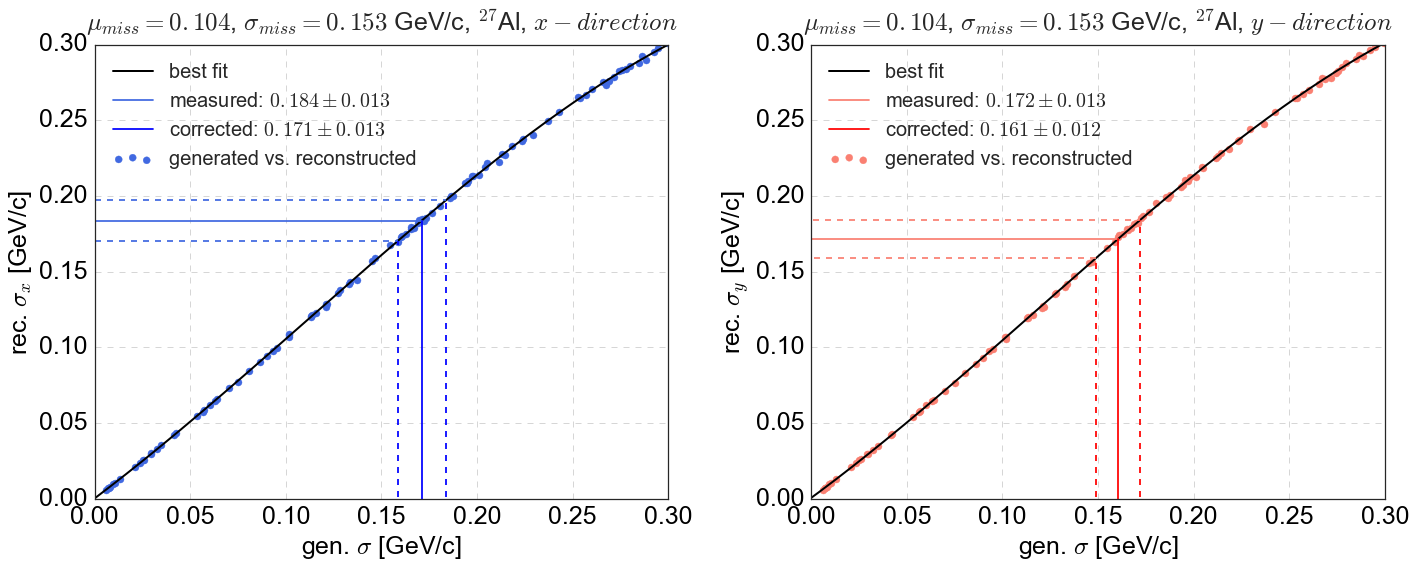

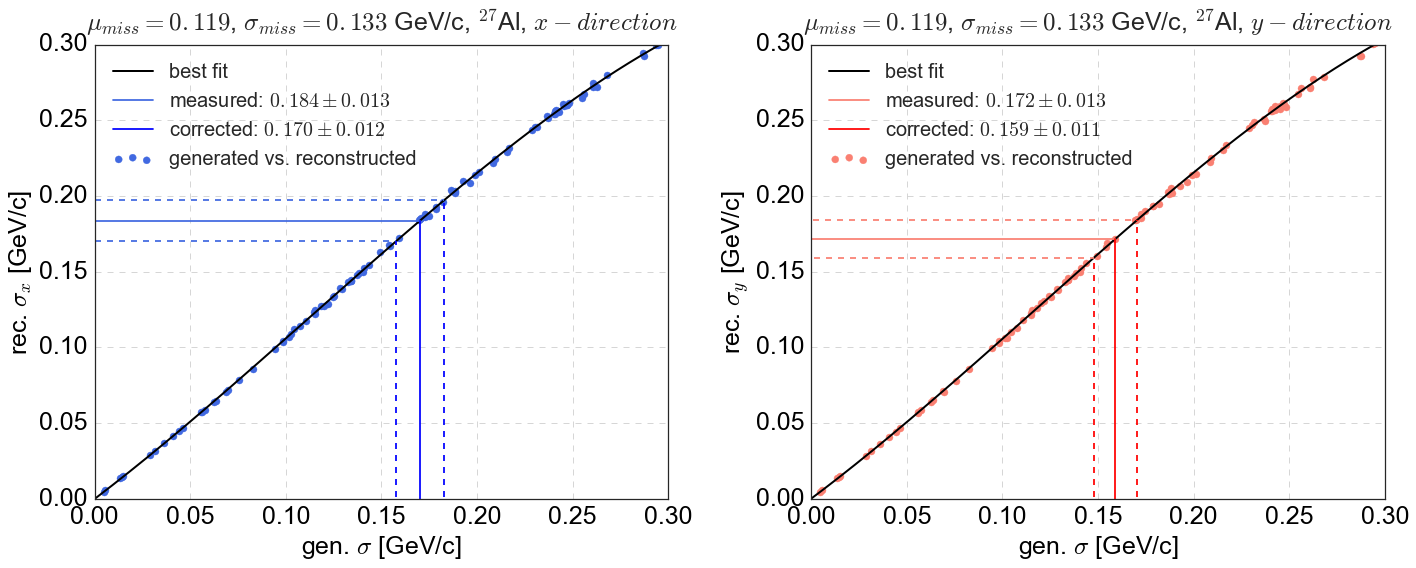

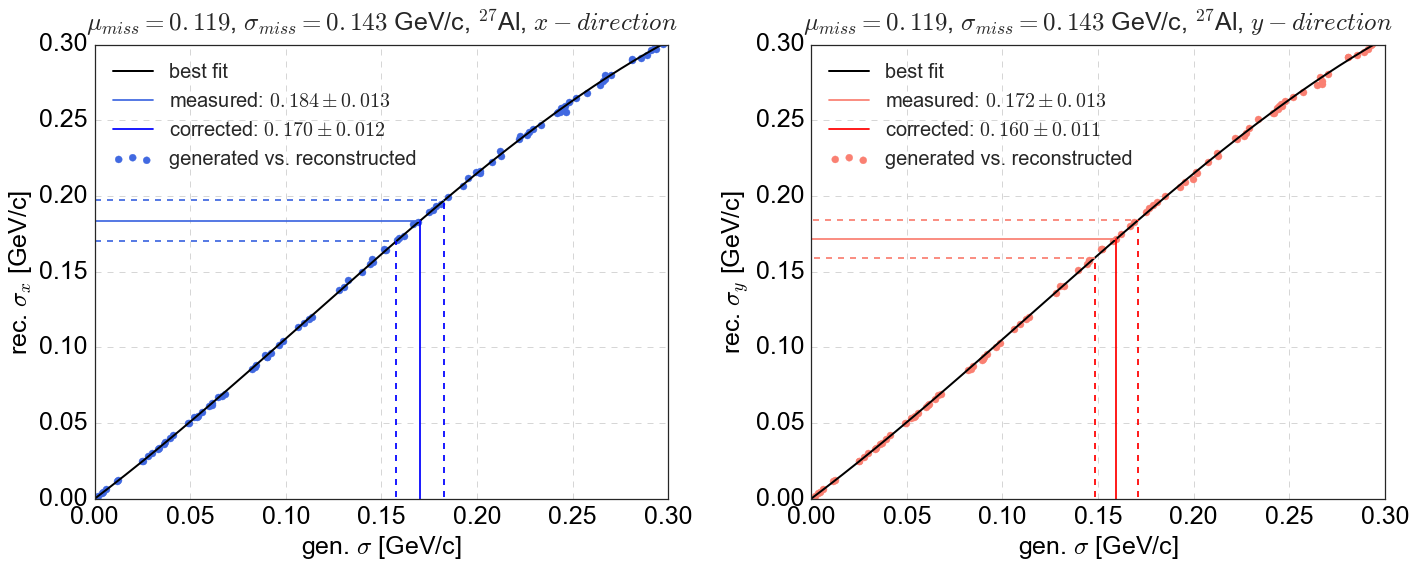

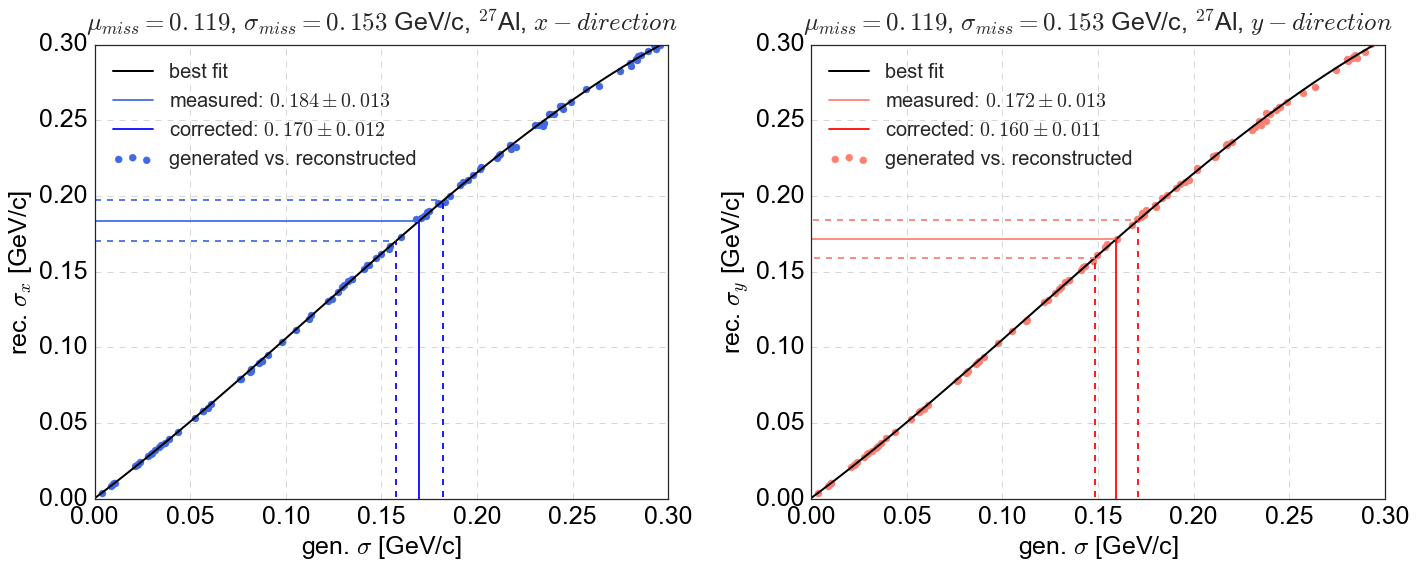

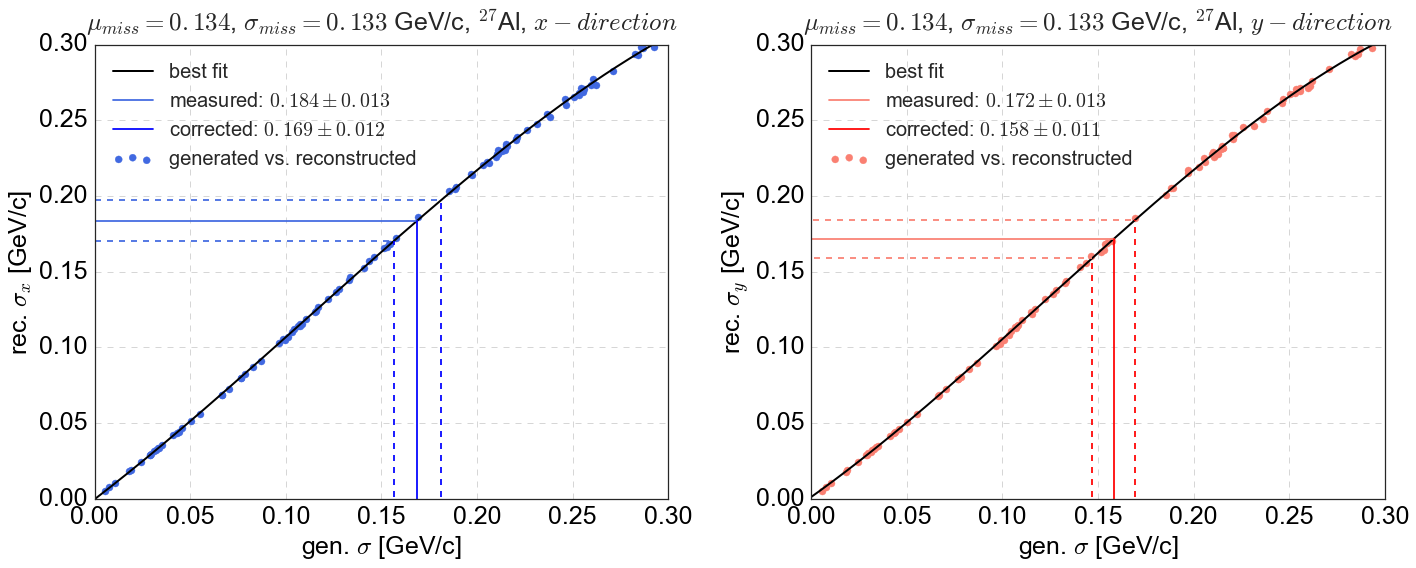

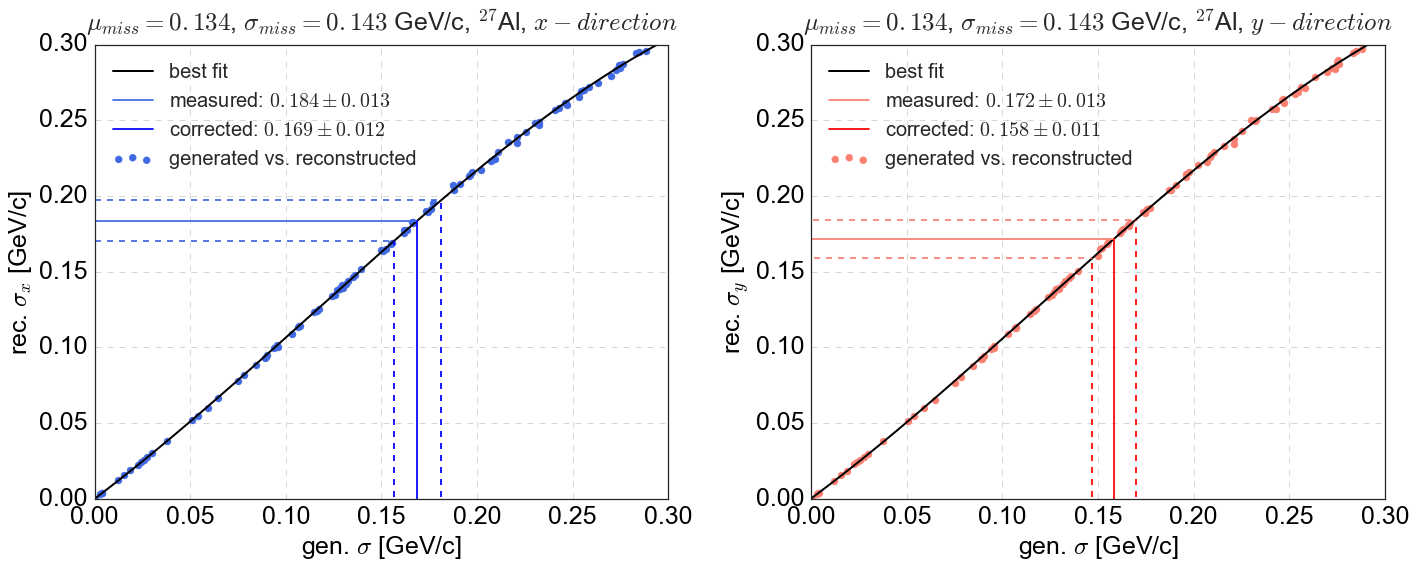

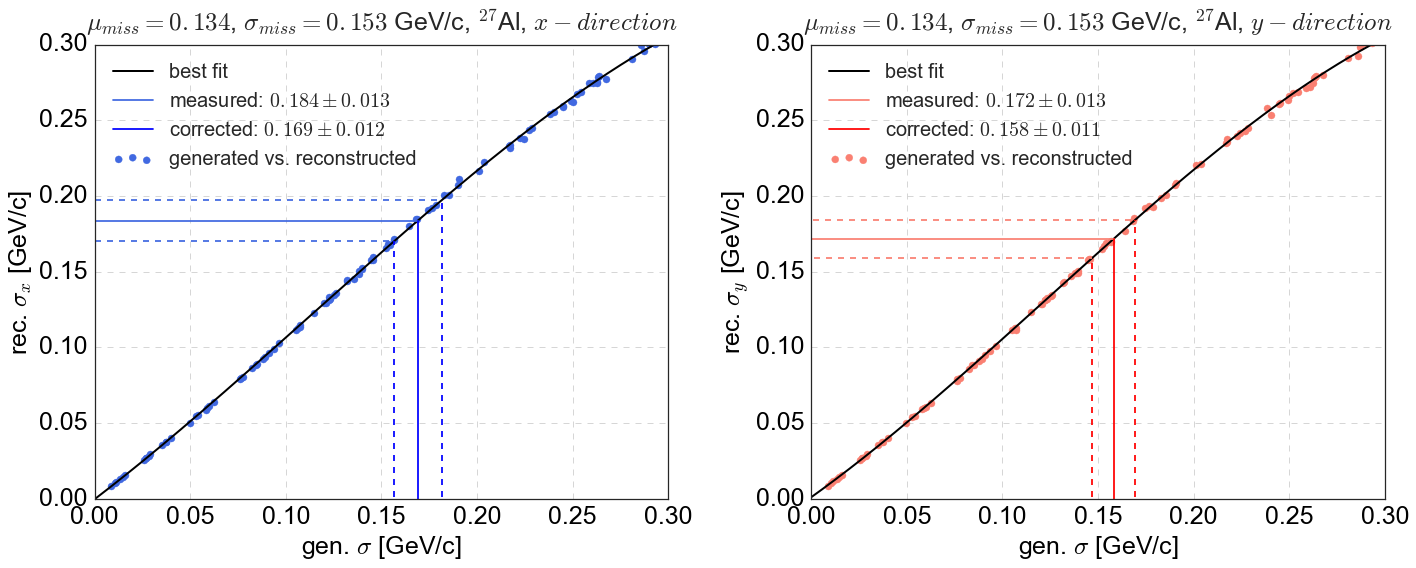

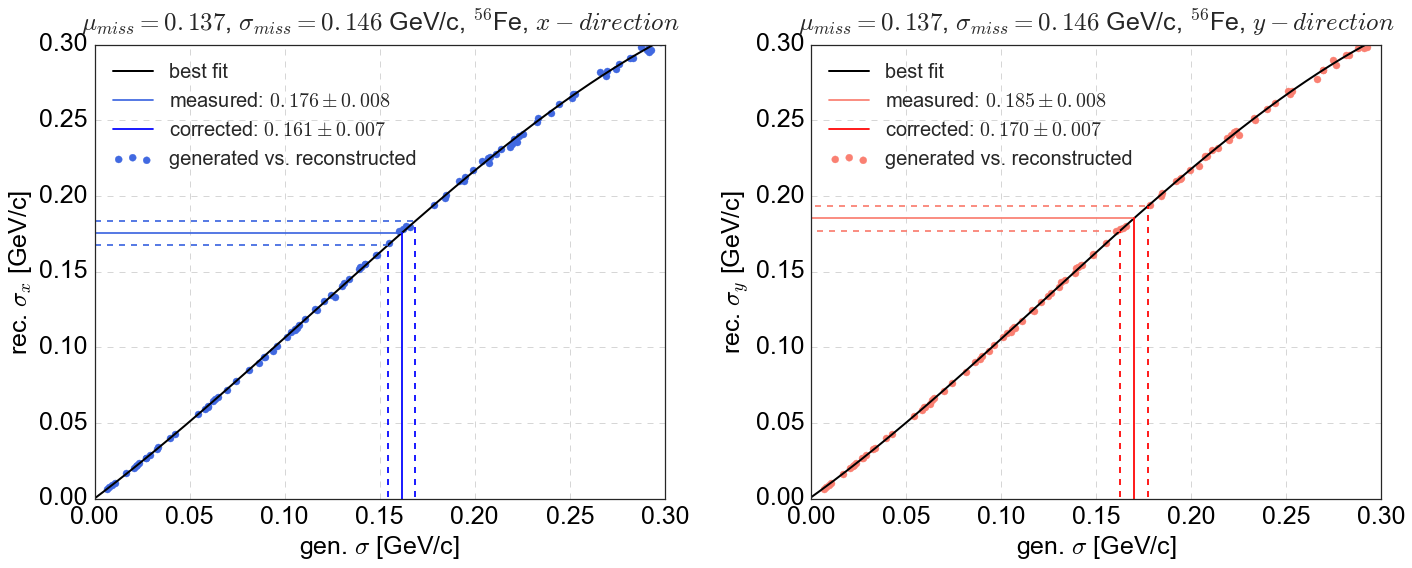

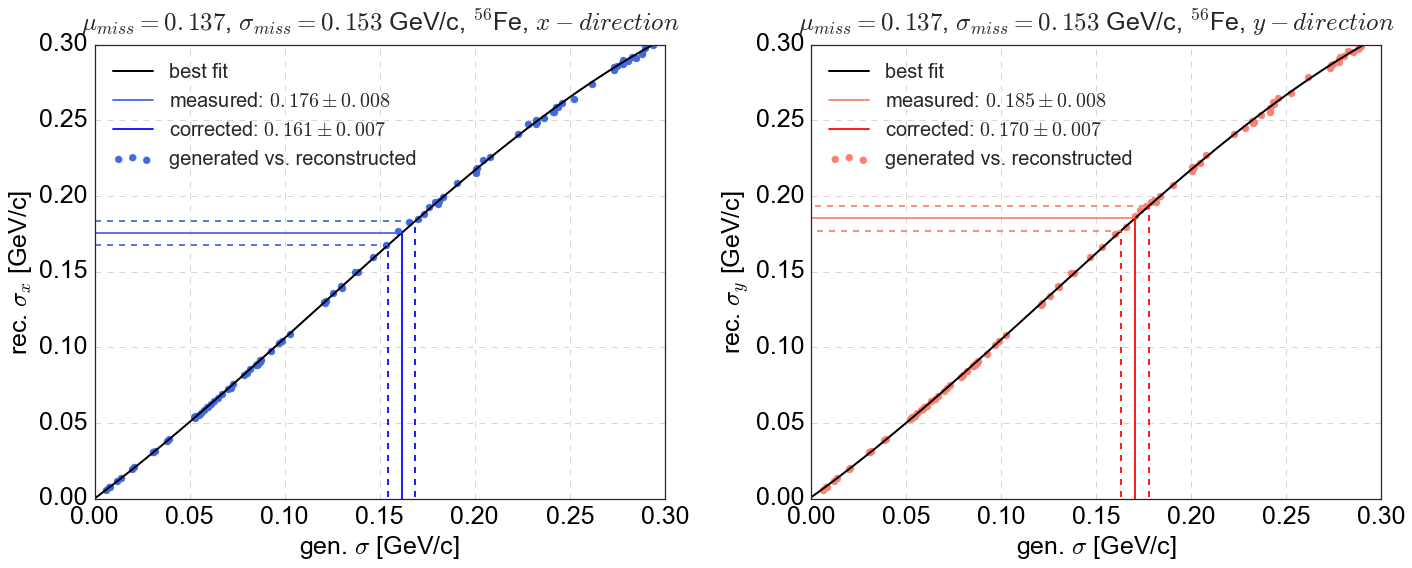

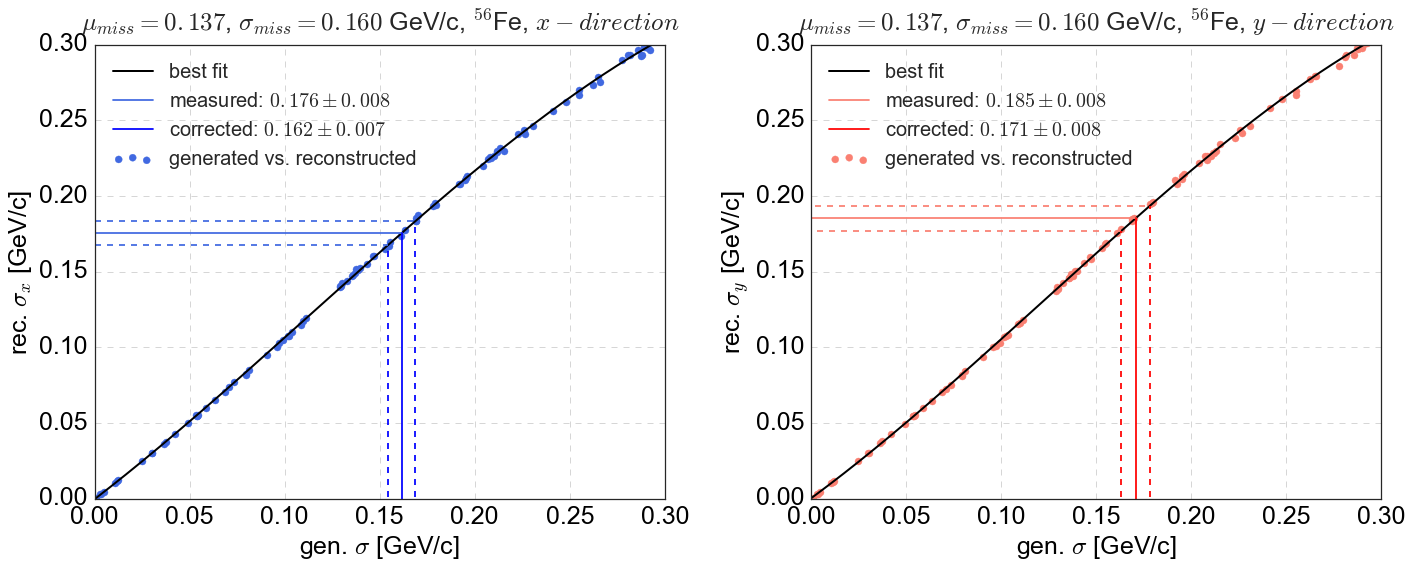

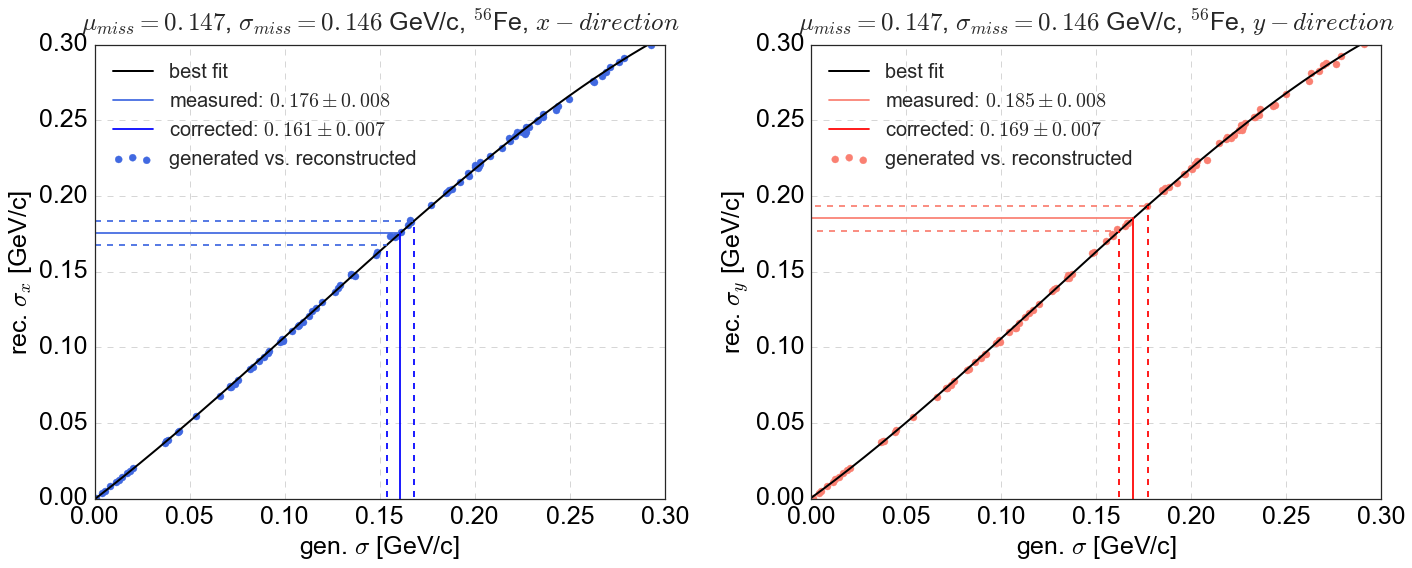

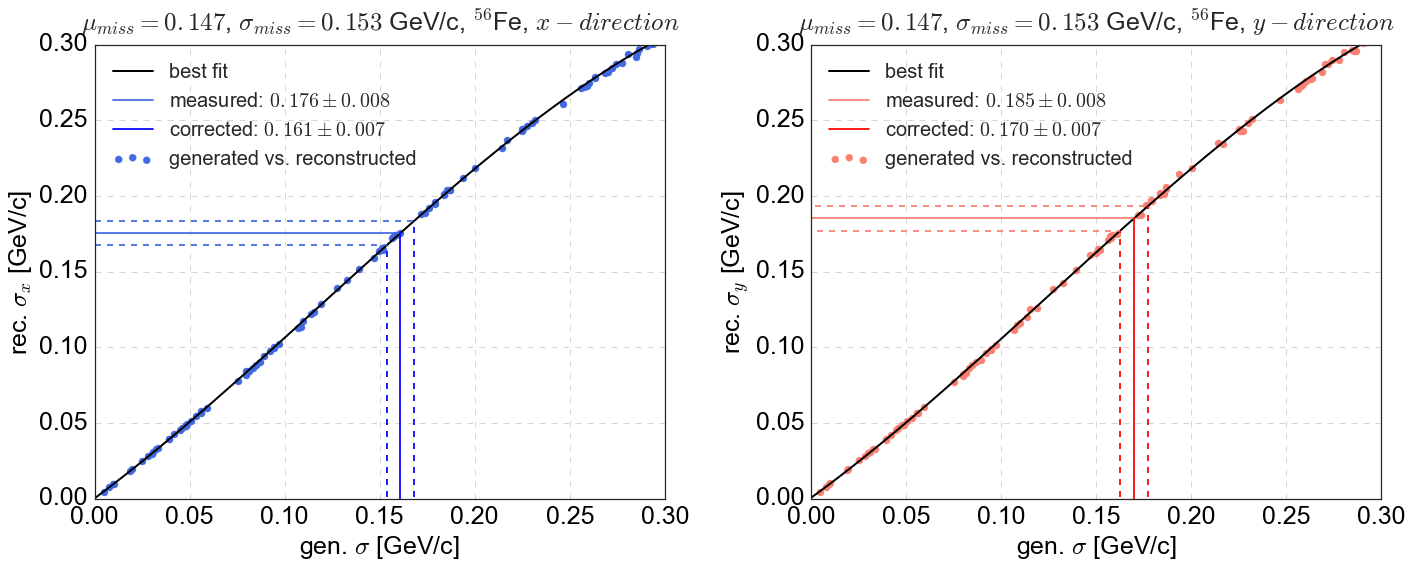

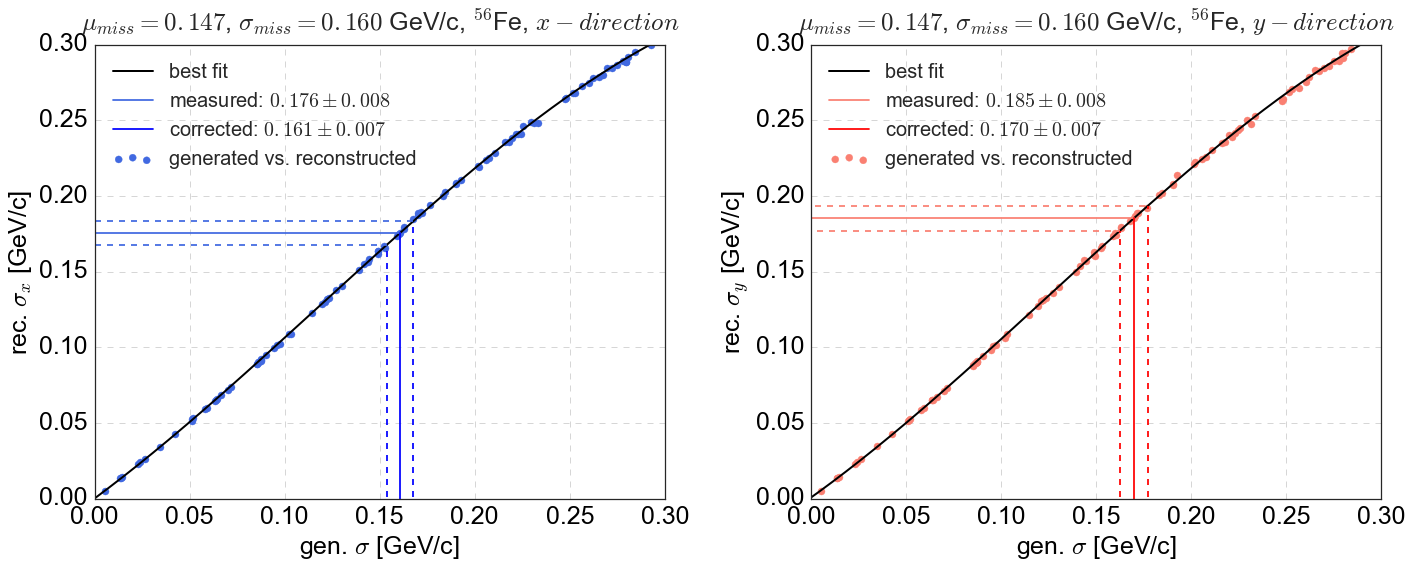

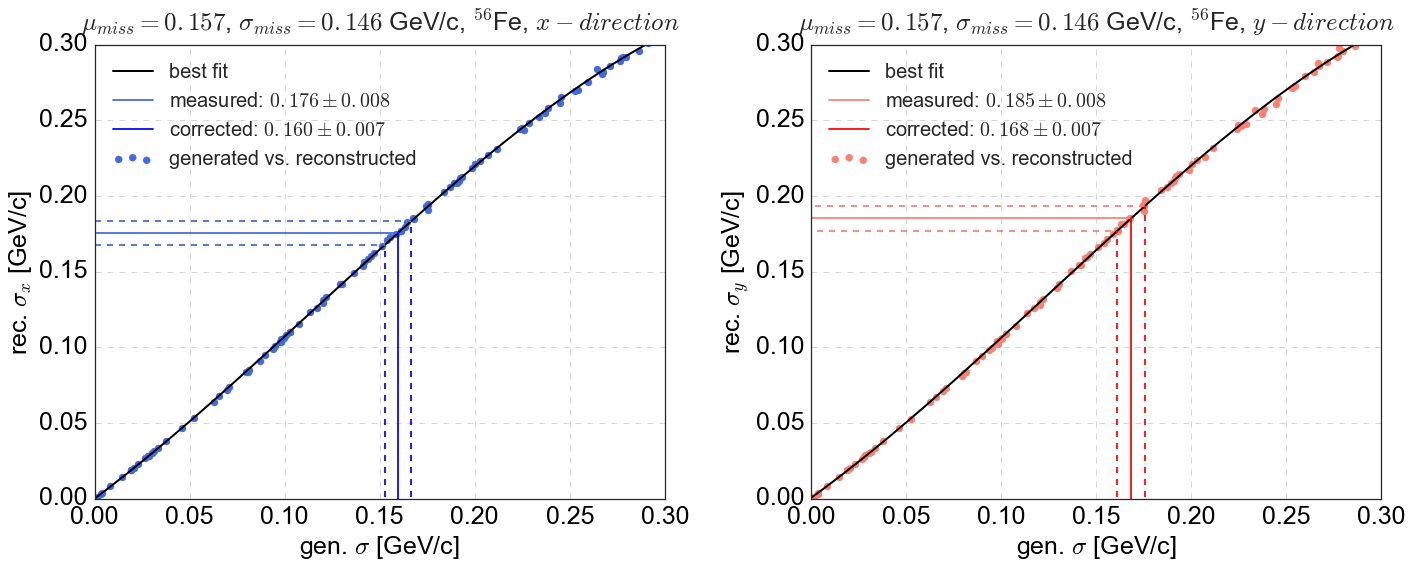

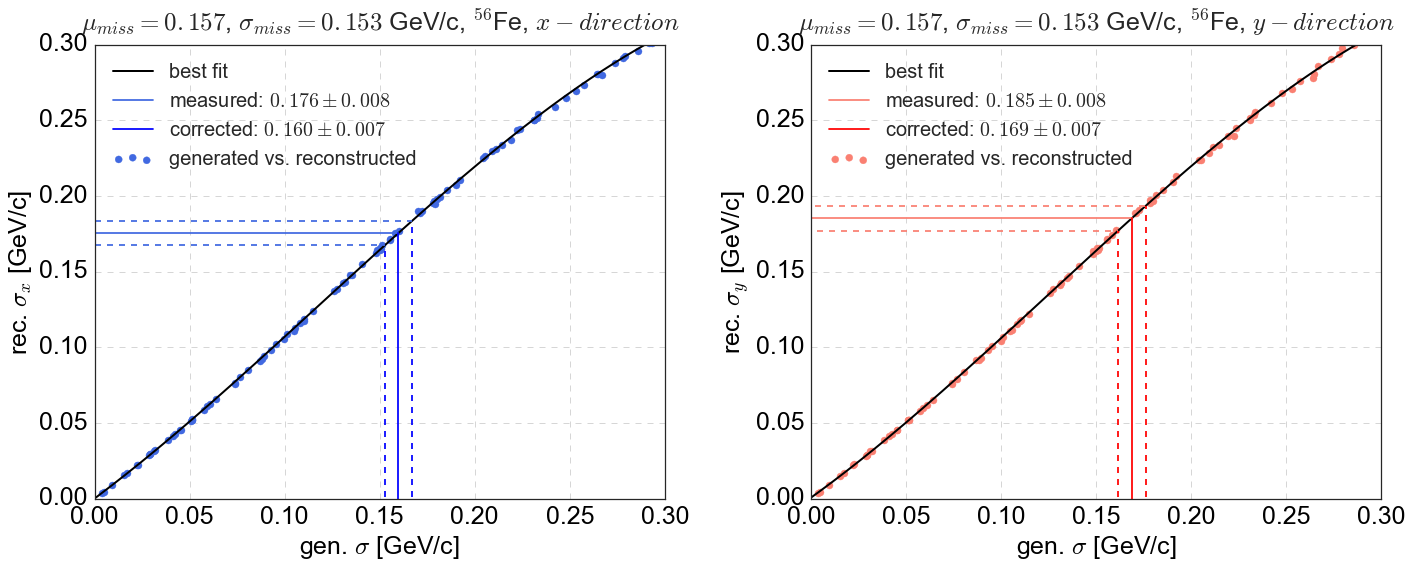

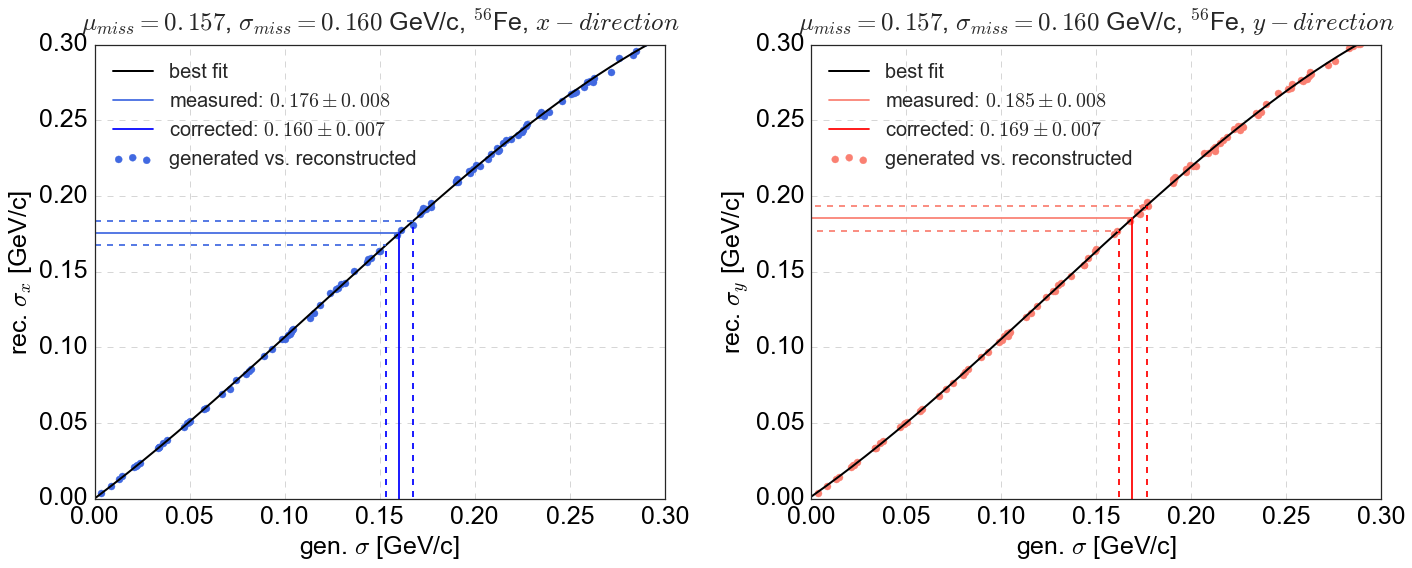

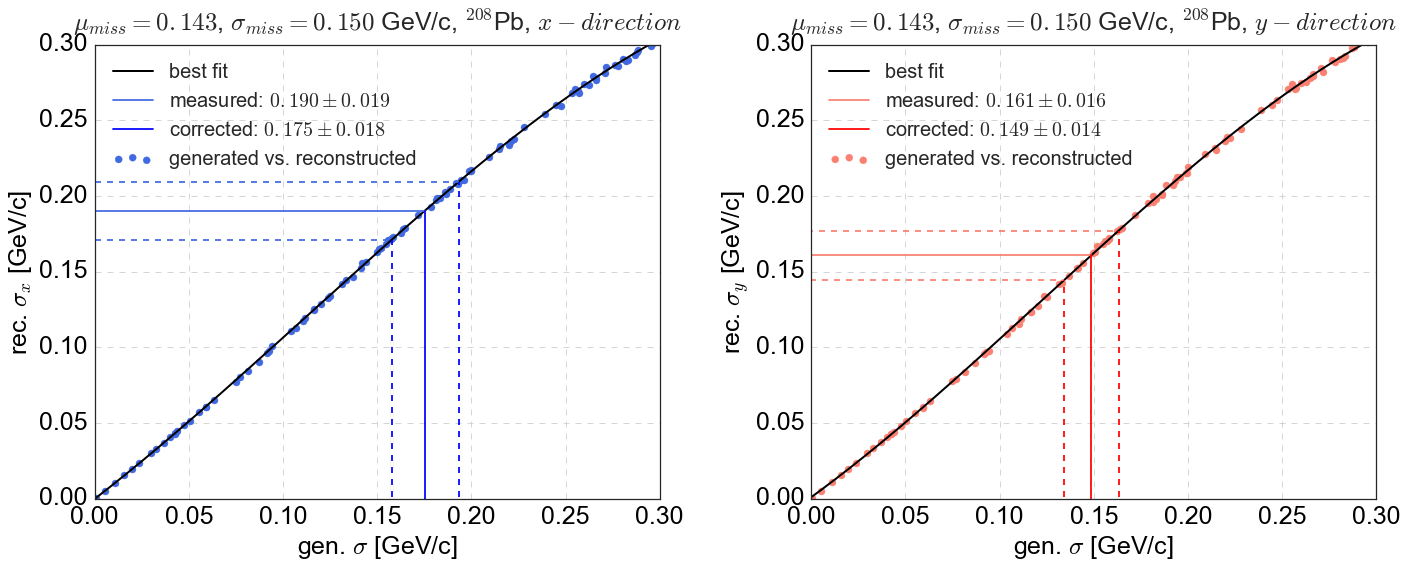

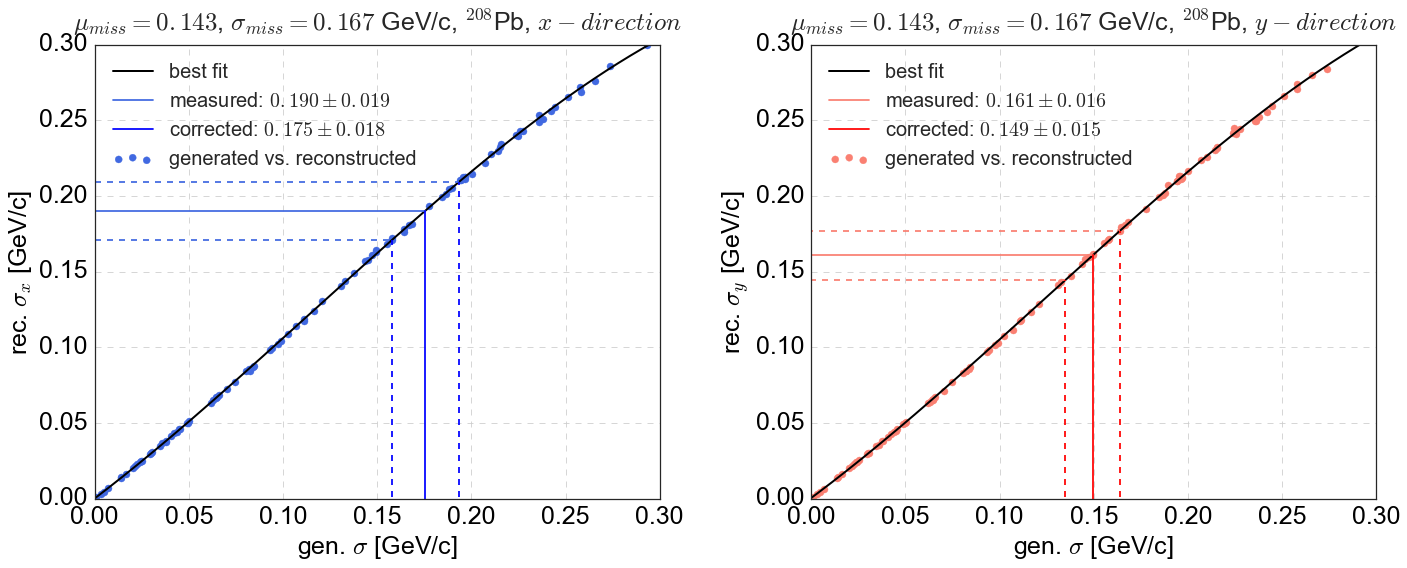

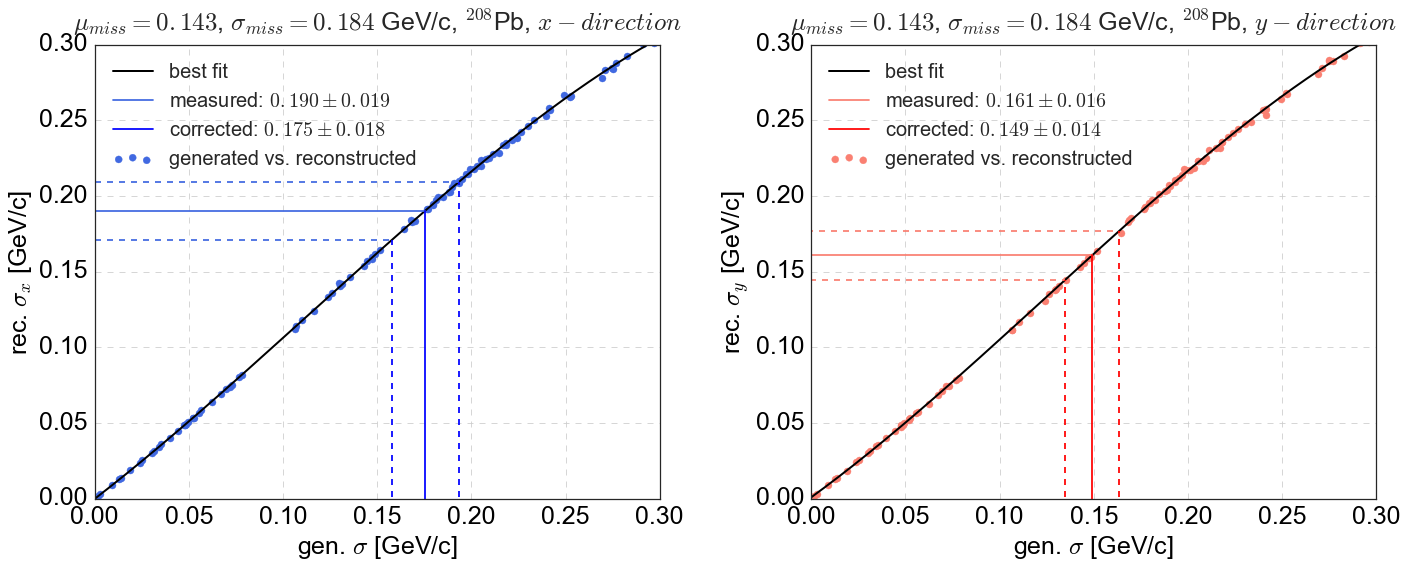

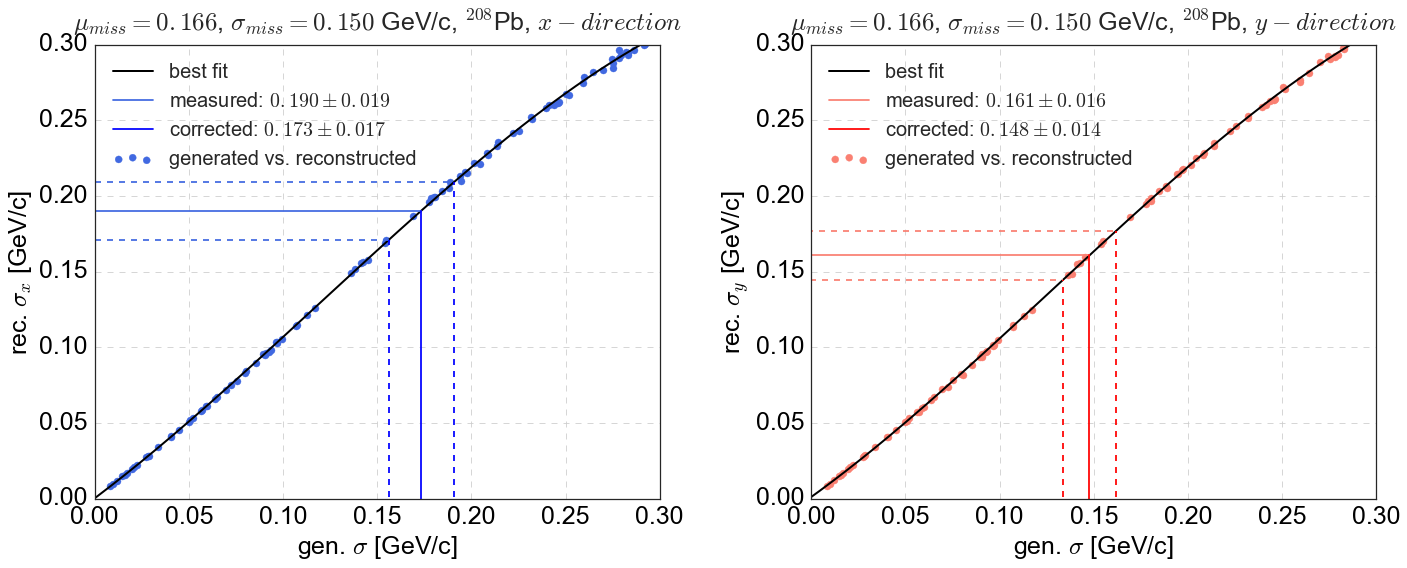

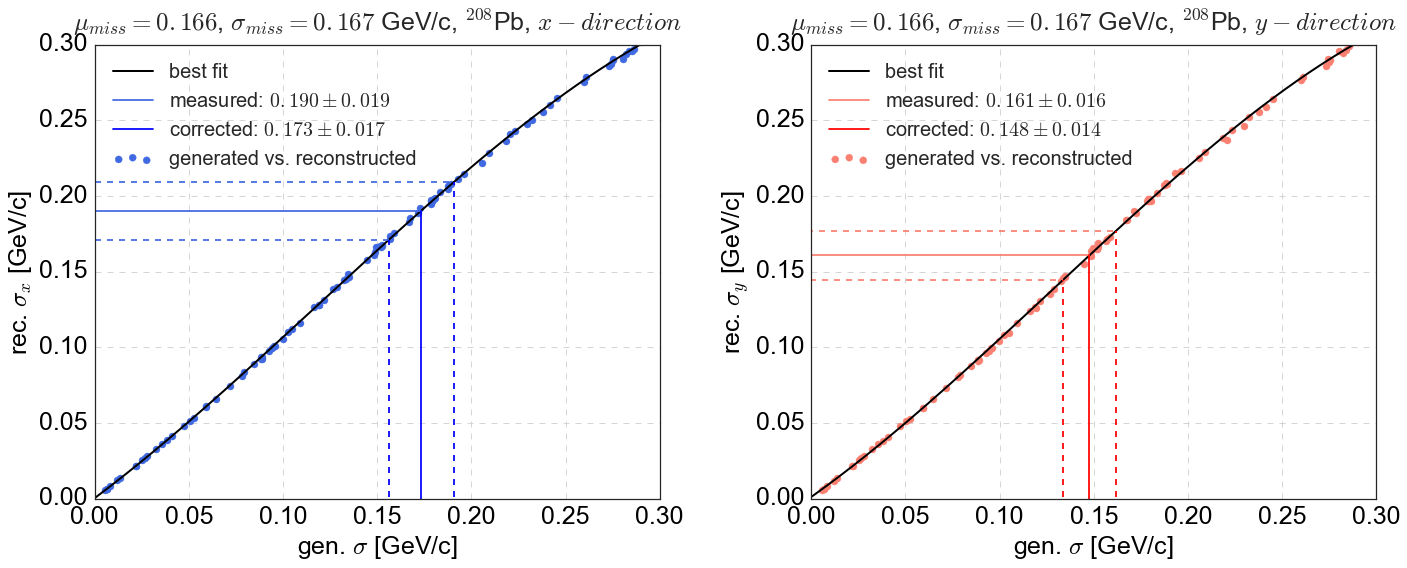

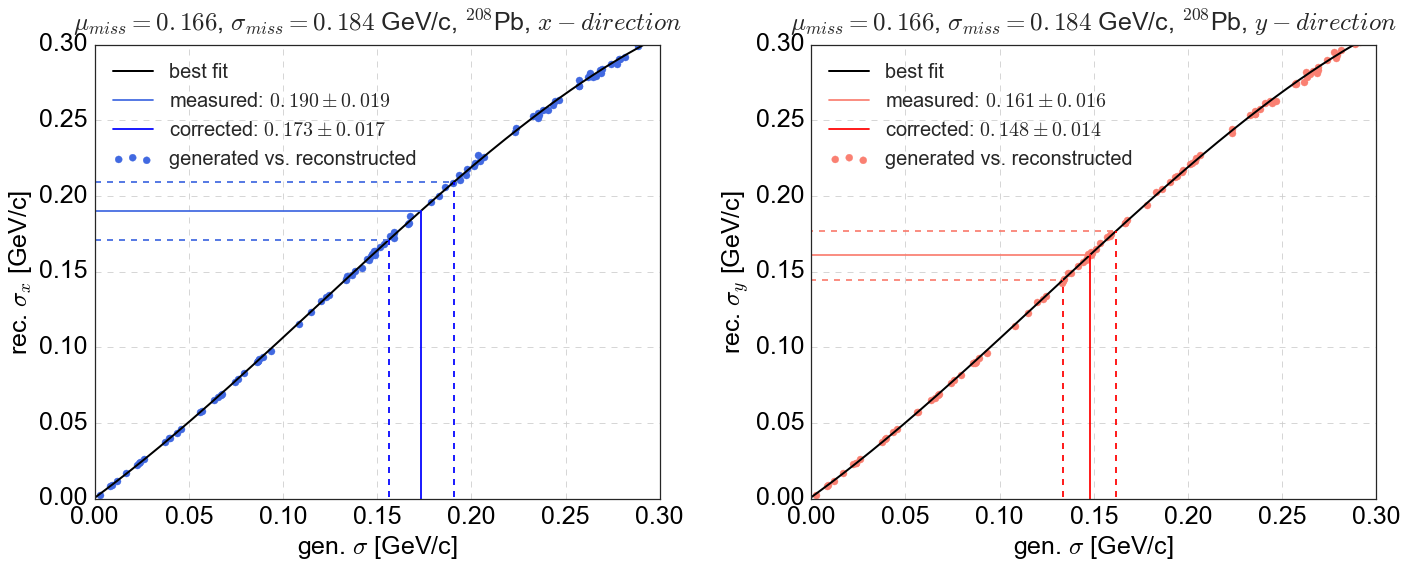

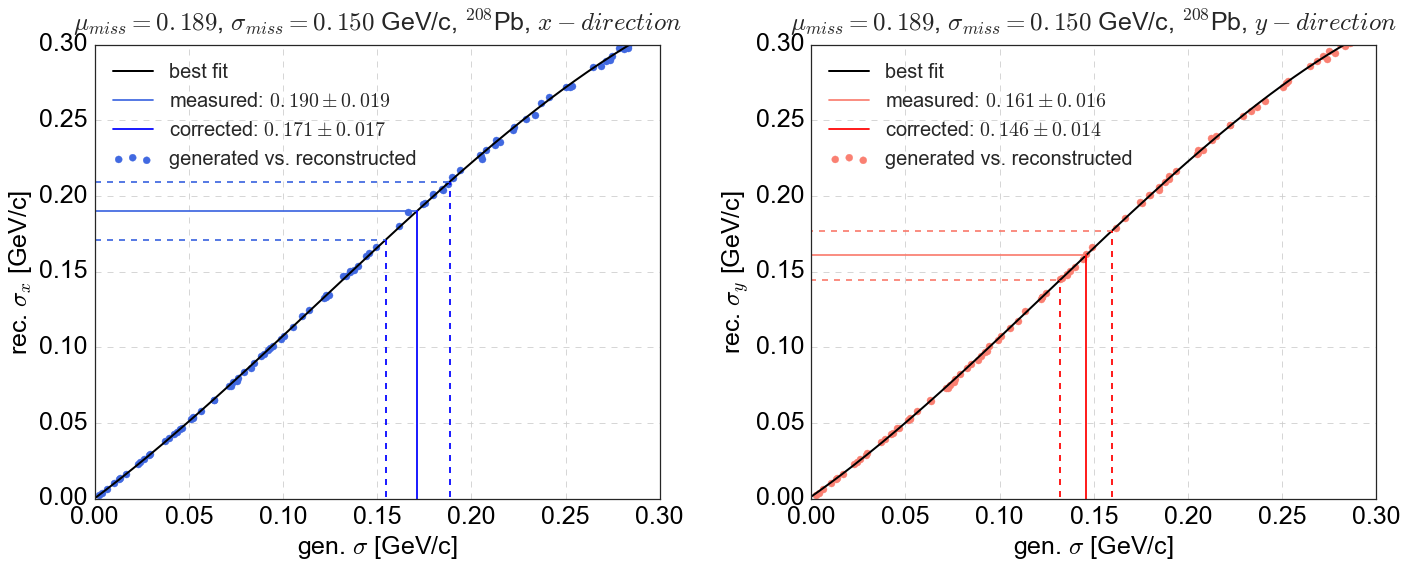

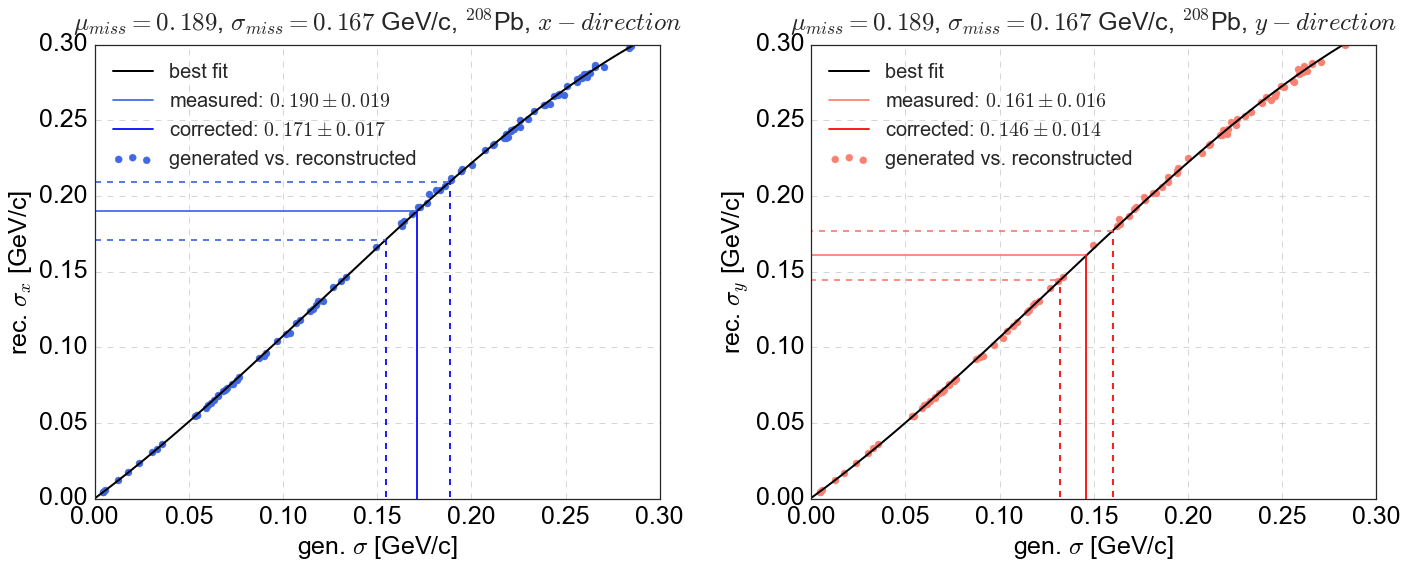

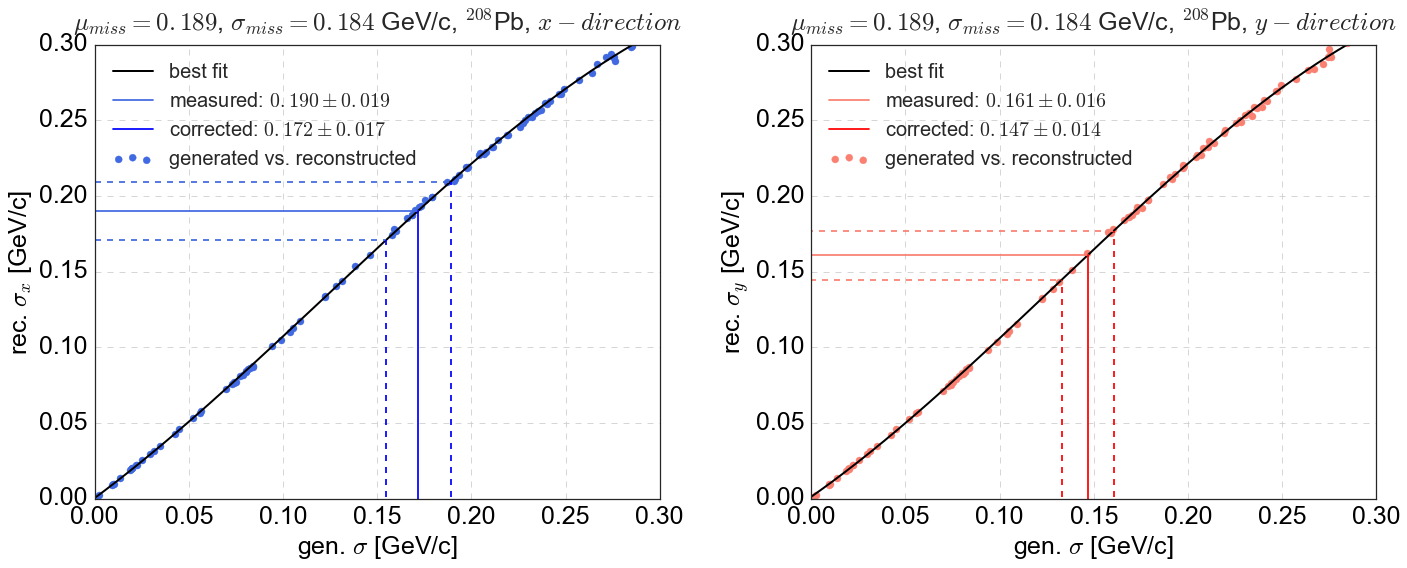

In [18]:
sigma_cm_corrected = dict()
sigma_cm_corrected_err = dict()

for A,target,target_name,mean_z,mean_z_err,sigma_z,sigma_z_err in zip([12,27,56,208]
                                                                      ,['C12','Al27','Fe56','Pb208']
                                                                      ,['C','Al','Fe','Pb']         
                                                                      # measured \mu(miss)
                                                                      ,[0.100,0.119,0.147,0.166]
                                                                      ,[0.008,0.015,0.010,0.023]
                                                                      # measured \sigma(miss)
                                                                      ,[0.146,0.143,0.153,0.167]
                                                                      ,[0.006,0.010,0.007,0.017]
                                                                     ):#{
        sigma_cm_corrected[target] = []
        sigma_cm_corrected_err[target] = []

        
        for gen_mean_z in [ mean_z-mean_z_err , mean_z , mean_z+mean_z_err ]:#{
            for gen_sigma_z in [ sigma_z-sigma_z_err , sigma_z , sigma_z+sigma_z_err ]:#{
                test_name = 'simulation_300Pmiss600_%s_genMeanZ_%.3f_genSigmaZ_%.3f_%d_%d'%( target_name , gen_mean_z, gen_sigma_z , start_run , end_run)
                simulations_results=simulation_results[test_name]
                name = "$\\mu_{miss}=%.3f$, $\\sigma_{miss}=%.3f$ "%(gen_mean_z,gen_sigma_z)
        
                fig=plt.figure(figsize=(20,8))
                ax=fig.add_subplot(1,2,1)
                corr_sigma_x, corr_sigma_x_err = plot_cm_direction(simulations_results=simulations_results,name=name,ax=ax                                  
                                                                   ,A=A,direction='x',colors=['blue','royalblue']);

                ax=fig.add_subplot(1,2,2)
                corr_sigma_y, corr_sigma_y_err = plot_cm_direction(simulations_results=simulation_results[test_name],name=name,ax=ax                                 
                                                                   ,A=A,direction='y',colors=['red','salmon']);
                
                sigma_cm_corrected[target].append( 0.5*(corr_sigma_x+corr_sigma_y) )
                sigma_cm_corrected_err[target].append( 0.5*np.sqrt( np.square(corr_sigma_x_err) + np.square(corr_sigma_y_err) ) )

                plt.tight_layout()
                outfilename = figures_path + 'sigma_t_corr_%s_mZ_%.3f_sZ_%.3f.pdf'%( target_name , gen_mean_z, gen_sigma_z )
#                 plt.savefig(outfilename)
#                 print 'saved image to ',outfilename

In [19]:
cm_pars_with_correction['sigma_t_final'] = 0.0
cm_pars_with_correction['sigma_t_final_err_positive'] = 0.0
cm_pars_with_correction['sigma_t_final_err_negative'] = 0.0

for A,target in zip([12,27,56,208],['C12','Al27','Fe56','Pb208']):
    sigma_cm_corrected[target] = np.array( sigma_cm_corrected[target] )
    sigma_cm_corrected_err[target] = np.array( sigma_cm_corrected_err[target] )
    
    print target
    print sigma_cm_corrected[target]
    print sigma_cm_corrected_err[target]

    average_sigma_cm_corrected = np.average( sigma_cm_corrected[target] , weights=sigma_cm_corrected[target] )
    min_sigma_cm_corrected = np.min( sigma_cm_corrected[target] - sigma_cm_corrected_err[target] )
    max_sigma_cm_corrected = np.max( sigma_cm_corrected[target] + sigma_cm_corrected_err[target] )

    print 'corrected sigma_t = %.3f(+ %.3f)(- %.3f)'%(average_sigma_cm_corrected , max_sigma_cm_corrected-average_sigma_cm_corrected , average_sigma_cm_corrected-min_sigma_cm_corrected  )
    print 

    
    index = cm_pars_with_correction[cm_pars_with_correction['A']==A].index
    cm_pars_with_correction.set_value( index , 'sigma_t_final' , average_sigma_cm_corrected )
    cm_pars_with_correction.set_value( index , 'sigma_t_final_err_positive' , max_sigma_cm_corrected-average_sigma_cm_corrected )
    cm_pars_with_correction.set_value( index , 'sigma_t_final_err_negative' , average_sigma_cm_corrected-min_sigma_cm_corrected )

cm_pars_with_correction[['sigma_t','sigma_tErr','sigma_t_final','sigma_t_final_err_positive','sigma_t_final_err_negative']]

C12
[ 0.14674705  0.14667685  0.14680148  0.14612339  0.1461996   0.14642489
  0.14566487  0.14571255  0.1458159 ]
[ 0.00416959  0.00415373  0.00415917  0.00413624  0.00413073  0.00412668
  0.00410749  0.00409925  0.00410833]
corrected sigma_t = 0.146(+ 0.005)(- 0.005)

Al27
[ 0.16610201  0.16577426  0.16574706  0.1646005   0.16493102  0.16476507
  0.16344933  0.16351788  0.16355846]
[ 0.00861185  0.00853712  0.00854965  0.00846481  0.00848027  0.00845474
  0.00833853  0.00835687  0.00834468]
corrected sigma_t = 0.165(+ 0.010)(- 0.010)

Fe56
[ 0.16567098  0.16590306  0.1661183   0.16512285  0.16537096  0.16517012
  0.16395431  0.16423561  0.16470316]
[ 0.00517941  0.00516977  0.00521223  0.00515834  0.00514501  0.00512713
  0.00508523  0.00509503  0.00509907]
corrected sigma_t = 0.165(+ 0.006)(- 0.006)

Pb208
[ 0.16196084  0.16243164  0.16228687  0.16053628  0.16049785  0.16052244
  0.15854212  0.15871711  0.1591892 ]
[ 0.01146315  0.01148632  0.01146188  0.01121972  0.0111856   0.0112

sigma_t  sigma_tErr  sigma_t_final  sigma_t_final_err_positive  \
0  0.157056    0.004580       0.146242                    0.004719   
1  0.177730    0.009215       0.164722                    0.009992   
2  0.180429    0.005741       0.165142                    0.006189   
3  0.175565    0.012571       0.160533                    0.013385   

   sigma_t_final_err_negative  
0                    0.004685  
1                    0.009611  
2                    0.006273  
3                    0.012933

# add calculations...

In [20]:
ColleCalc = pd.DataFrame({'A':[4,12 , 27 , 56 , 208],
                        'allpairs':[0.110,0.140,0.144,0.146,0.145],
                        'nl00':[0.110,0.156,0.164,0.172,0.178]},
                         index = ['$^{4}$He','$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb'])
CiofiCalc = pd.DataFrame({'A':[4 , 12 , 16 , 40 , 56 , 208], # 3 , 
                        's_t':[0.0899 , 0.1393 , 0.1272 , 0.1407 , 0.1328 , 0.1511]}, # 0.0724
                         index = ['$^{4}$He','$^{12}$C','$^{16}$O','$^{40}$Ca','$^{56}$Fe','$^{208}$Pb']) # '$^{3}$He',
MonizCalc = pd.DataFrame({'A':[12 , 40 , 208],
                        '3kF/4':[0.1658 , 0.1883 , 0.1988]},
                         index = ['$^{12}$C','$^{40}$Ca','$^{208}$Pb'])

BNL_Data = pd.DataFrame({'A':[12],'sigma_t_final':[0.143],'sigma_t_final_Err':[0.017]},index = ['$^{12}$C'])
HallA_Data = pd.DataFrame({'A':[12],'sigma_t_final':[0.136],'sigma_t_final_Err':[0.020]},index = ['$^{12}$C'])
Korover_Data = pd.DataFrame({'A':[4],'sigma_t_final':[0.100],'sigma_t_final_Err':[0.020]},index = ['$^{4}$He'])

WI_Data = pd.DataFrame({'A':[ 12 , 27 , 56 , 208], 
                        'sigma_t_final':[0.158 , 0.156 , 0.181 , 0.174], 
                        'sigma_t_final_Err':[0.012 , 0.019 , 0.011 , 0.016]}, 
                         index = ['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']) 

In [21]:
def plot_data(data , Ashift=0, fmt='o', marker='^',color='red',
                       markersize=15, linewidth=4, 
                       vary=None , varyerr=None , label=None ):
    ax.errorbar((data['A']+Ashift), data['sigma_t_final'], yerr=data['sigma_t_final_Err'],                
                color=color, marker=marker,markersize=markersize,linewidth=linewidth, fmt=fmt,label=label)

def plot_data_assymeteric_err(data , Ashift=0, fmt='o', marker='^',color='red',
                       markersize=15, linewidth=4, 
                       vary=None , varyerr=None , label=None ):
    ax.errorbar((data['A']+Ashift), data['sigma_t_final'],
                yerr=[data['sigma_t_final_err_negative'],data['sigma_t_final_err_positive']],                
                color=color, marker=marker,markersize=markersize,linewidth=linewidth, fmt=fmt,label=label)


def plot_calculation_line( data , varx='A',kind='nearest' , vary=None , color='blue' ,linestyle='--', label=None, linewidth=4):
    x = data[varx]
    y = data[vary]
    itp = interp1d(x,y, kind='linear')

    if kind is None:
        f = interp1d( x , y )
    else:
        f = interp1d( x , y ,kind=kind)

    window_size, poly_order = 101, 4
    xnew = np.linspace(x.min(),x.max(), num=500, endpoint=True)
    yy_sg = savgol_filter(itp(xnew), window_size, poly_order)
    plt.plot( xnew, yy_sg, linestyle, color=color , label=label, linewidth=linewidth )

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


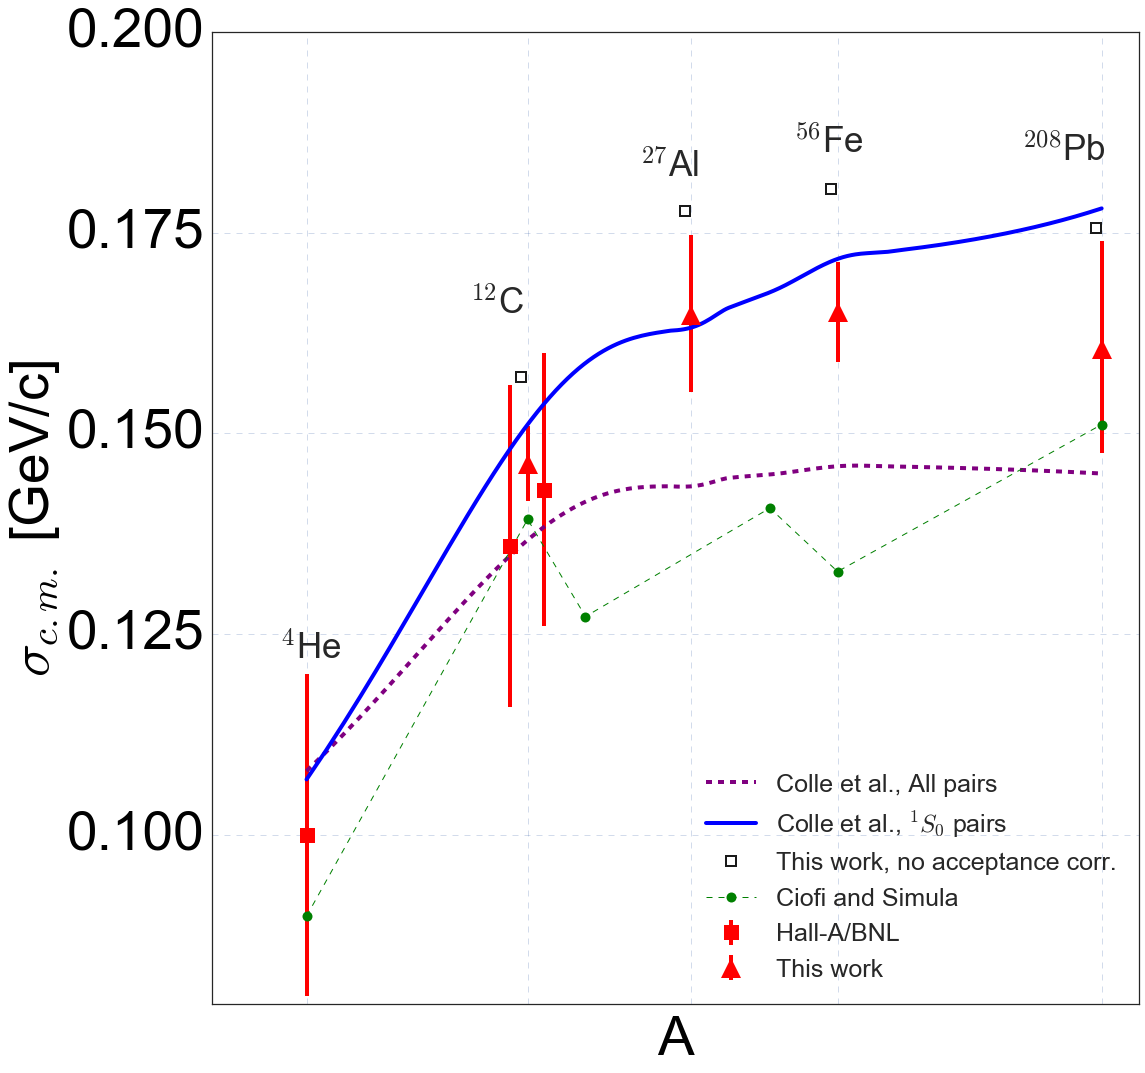

In [22]:
s=30
fig, ax = plt.subplots(figsize=(16,15))
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='allpairs',color='purple' ,label='Colle et al., All pairs')
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' ,linestyle='-', vary='nl00',label='Colle et al., $^1S_0$ pairs')
ax.errorbar(CiofiCalc.A, CiofiCalc.s_t,color='green',fmt='--o',ms=10,linewidth=1,label='Ciofi and Simula')

plot_data( data=BNL_Data, Ashift=1 , marker='s', label=None )
plot_data( data=HallA_Data, Ashift=-1 , marker='s' , label='Hall-A/BNL' )
plot_data( data=Korover_Data , marker='s' , label=None )

ax.plot(0.97*cm_pars['A'], cm_pars['sigma_t'] ,color='red', marker='s',mfc='none',lw = 2, mew = 2, ms = 10, linewidth=0, label='This work, no acceptance corr.')
plot_data_assymeteric_err( data=cm_pars_with_correction, label='This work', markersize=20 )

ax.set_xscale('log')


set_axes(ax , 'A' , '$\sigma_{c.m.}$ [GeV/c]' , fontsize=55 , xticks=[4,12,27,56,208],yticks=[0.1,0.125,0.15,0.175,0.2])
# ax.legend(fontsize=25,bbox_to_anchor=(1.05, 1), borderaxespad=0.,loc=2)
ax.legend(fontsize=25,loc='lower right')
ax.grid(b=True, which='major', color='b', linestyle='--',alpha=0.25)

ax.set_xlim(2.5,250);
ax.set_ylim(0.079,0.200);
ax.text(3.5,0.122,'$^4$He',fontsize=35)
ax.text(9,0.165,'$^{12}$C',fontsize=35)
ax.text(21,0.182,'$^{27}$Al',fontsize=35)
ax.text(45,0.185,'$^{56}$Fe',fontsize=35)
ax.text(140,0.184,'$^{208}$Pb',fontsize=35)
plt.tight_layout()
plt.savefig( figures_path + 'corrected_sigma_t_with_calculations.pdf')

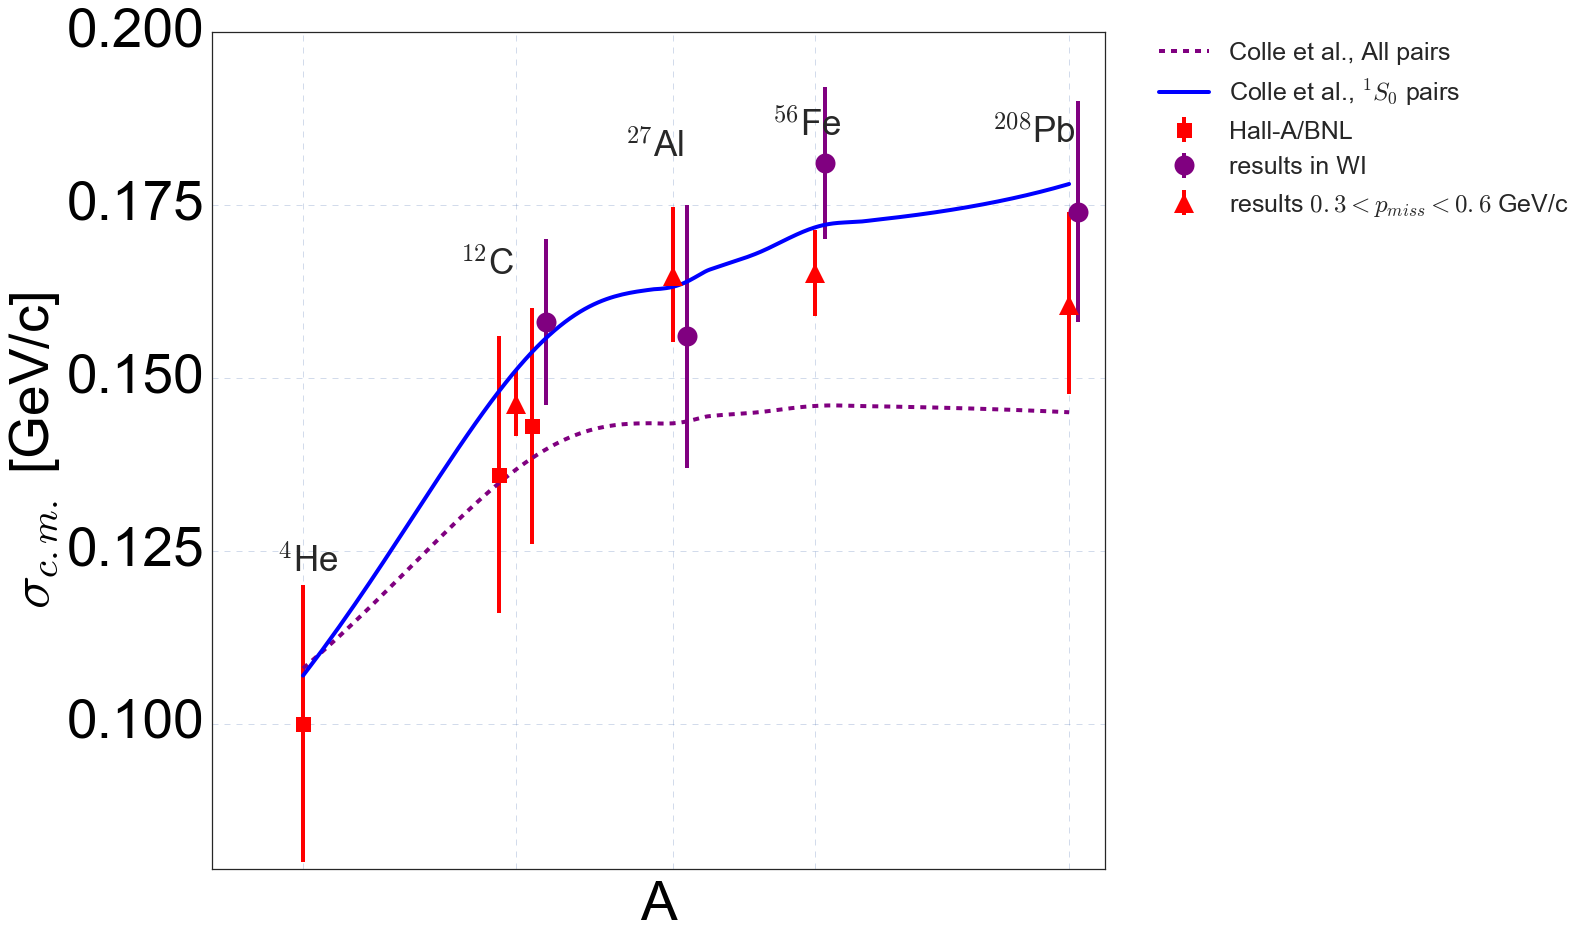

In [29]:
fig, ax = plt.subplots(figsize=(16,15))
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='allpairs',color='purple' ,label='Colle et al., All pairs')
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' ,linestyle='-', vary='nl00',label='Colle et al., $^1S_0$ pairs')

plot_data( data=BNL_Data, Ashift=1 , marker='s', label=None )
plot_data( data=HallA_Data, Ashift=-1 , marker='s' , label='Hall-A/BNL' )
plot_data( data=Korover_Data , marker='s' , label=None )

plot_data( data=WI_Data, label='results in WI',Ashift=[2,2,3,10],  markersize=20 , marker='o', color='purple')
plot_data_assymeteric_err( data=cm_pars_with_correction, label='results $0.3<p_{miss}<0.6$ GeV/c', markersize=20 )

ax.set_xscale('log')

set_axes(ax , 'A' , '$\sigma_{c.m.}$ [GeV/c]' , fontsize=55 , xticks=[4,12,27,56,208],yticks=[0.1,0.125,0.15,0.175,0.2])
ax.legend(fontsize=25,bbox_to_anchor=(1.05, 1), borderaxespad=0.,loc=2)
ax.grid(b=True, which='major', color='b', linestyle='--',alpha=0.25)

ax.set_xlim(2.5,250);
ax.set_ylim(0.079,0.200);
ax.text(3.5,0.122,'$^4$He',fontsize=35)
ax.text(9,0.165,'$^{12}$C',fontsize=35)
ax.text(21,0.182,'$^{27}$Al',fontsize=35)
ax.text(45,0.185,'$^{56}$Fe',fontsize=35)
ax.text(140,0.184,'$^{208}$Pb',fontsize=35)
plt.savefig( figures_path + 'corrected_sigma_t_vs_WI_results.pdf')

In [24]:
simulation145 = dict()
for filename in ['NoAcceptance_NoPrecMomentum_NoPrecFiducial_NoPrecResSmear'
                 ,'Acceptance_NoPrecMomentum_NoPrecFiducial_NoPrecResSmear'
                 ,'Acceptance_PrecMomentum_NoPrecFiducial_PrecResSmear']:
    simulation145[filename] = read_root( "/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/rootfiles_special_runs//sigma145MeVc_%s.root"%filename, columns=columns )
simulation190 = dict()
for filename in ['NoAcceptance_NoPrecMomentum_NoPrecFiducial_NoPrecResSmear'
                 ,'Acceptance_NoPrecMomentum_NoPrecFiducial_NoPrecResSmear'
                 ,'Acceptance_PrecMomentum_NoPrecFiducial_PrecResSmear']:
    simulation190[filename] = read_root( "/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/rootfiles_special_runs/sigma190MeVc_%s.root"%filename, columns=columns )    

IOError: cannot read /Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/rootfiles_special_runs//sigma145MeVc_NoAcceptance_NoPrecMomentum_NoPrecFiducial_NoPrecResSmear.root

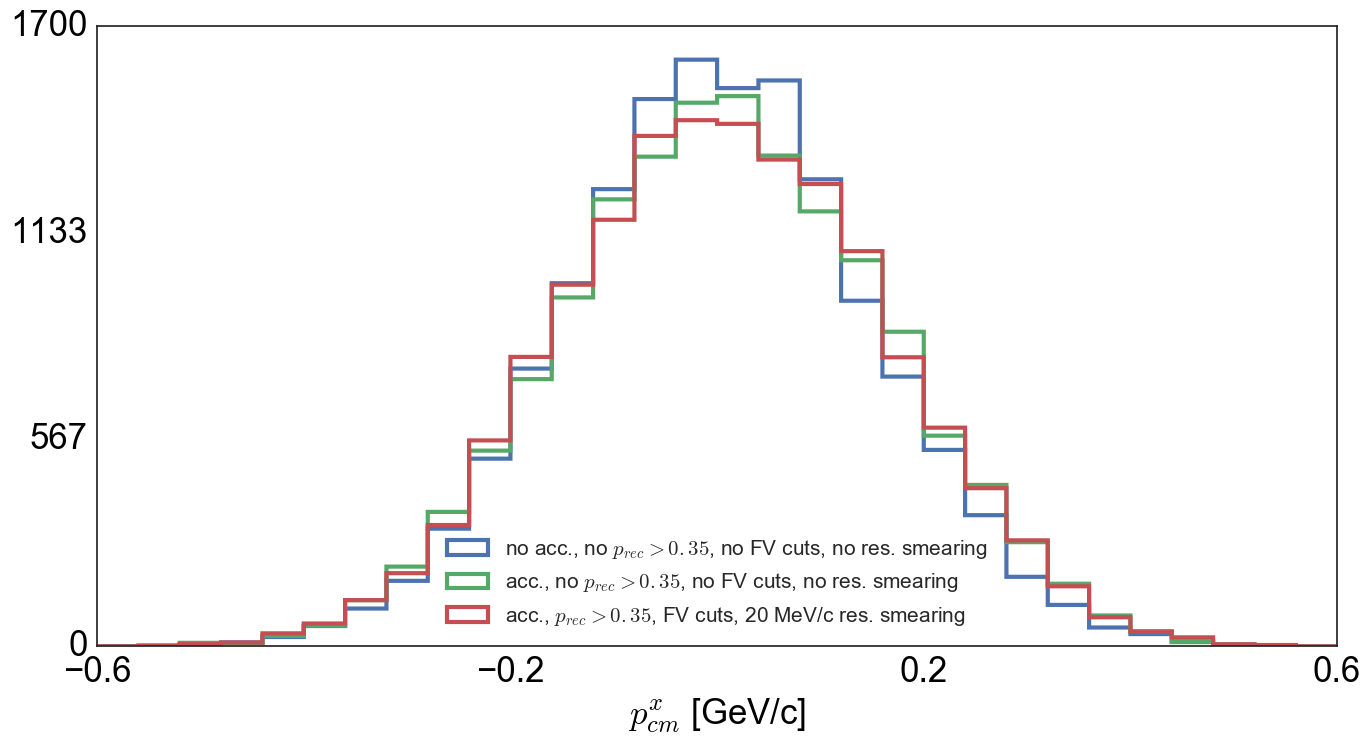

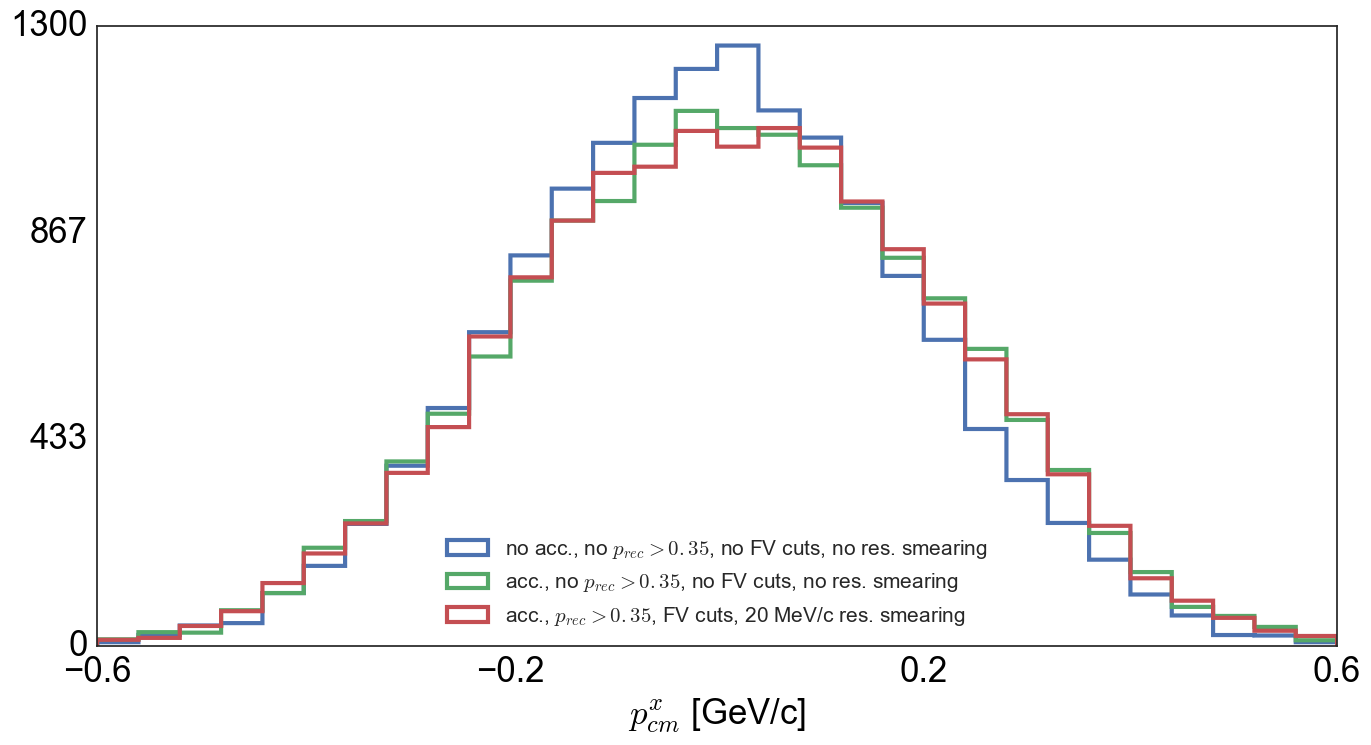

In [17]:
fig,ax=plt.subplots(figsize=(16,8))
for filename,label in zip(['NoAcceptance_NoPrecMomentum_NoPrecFiducial_NoPrecResSmear'
                 ,'Acceptance_NoPrecMomentum_NoPrecFiducial_NoPrecResSmear'
                 ,'Acceptance_PrecMomentum_NoPrecFiducial_PrecResSmear']
                          ,['no acc., no $p_{rec}>0.35$, no FV cuts, no res. smearing'
                            ,'acc., no $p_{rec}>0.35$, no FV cuts, no res. smearing'
                            ,'acc., $p_{rec}>0.35$, FV cuts, 20 MeV/c res. smearing']):
    plt.hist(simulation145[filename]['pcmX']
             ,bins=np.linspace(-0.6,0.6,31),histtype='step',linewidth=3
             ,label=label
            )
    ax.legend(fontsize=15,loc='lower center')
    set_axes(ax,'$p_{cm}^{x}$ [GeV/c]')
    
fig,ax=plt.subplots(figsize=(16,8))
for filename,label in zip(['NoAcceptance_NoPrecMomentum_NoPrecFiducial_NoPrecResSmear'
                 ,'Acceptance_NoPrecMomentum_NoPrecFiducial_NoPrecResSmear'
                 ,'Acceptance_PrecMomentum_NoPrecFiducial_PrecResSmear']
                          ,['no acc., no $p_{rec}>0.35$, no FV cuts, no res. smearing'
                            ,'acc., no $p_{rec}>0.35$, no FV cuts, no res. smearing'
                            ,'acc., $p_{rec}>0.35$, FV cuts, 20 MeV/c res. smearing']):
    plt.hist(simulation190[filename]['pcmX']
             ,bins=np.linspace(-0.6,0.6,31),histtype='step',linewidth=3
             ,label=label
            )
    ax.legend(fontsize=15,loc='lower center')
    set_axes(ax,'$p_{cm}^{x}$ [GeV/c]')    

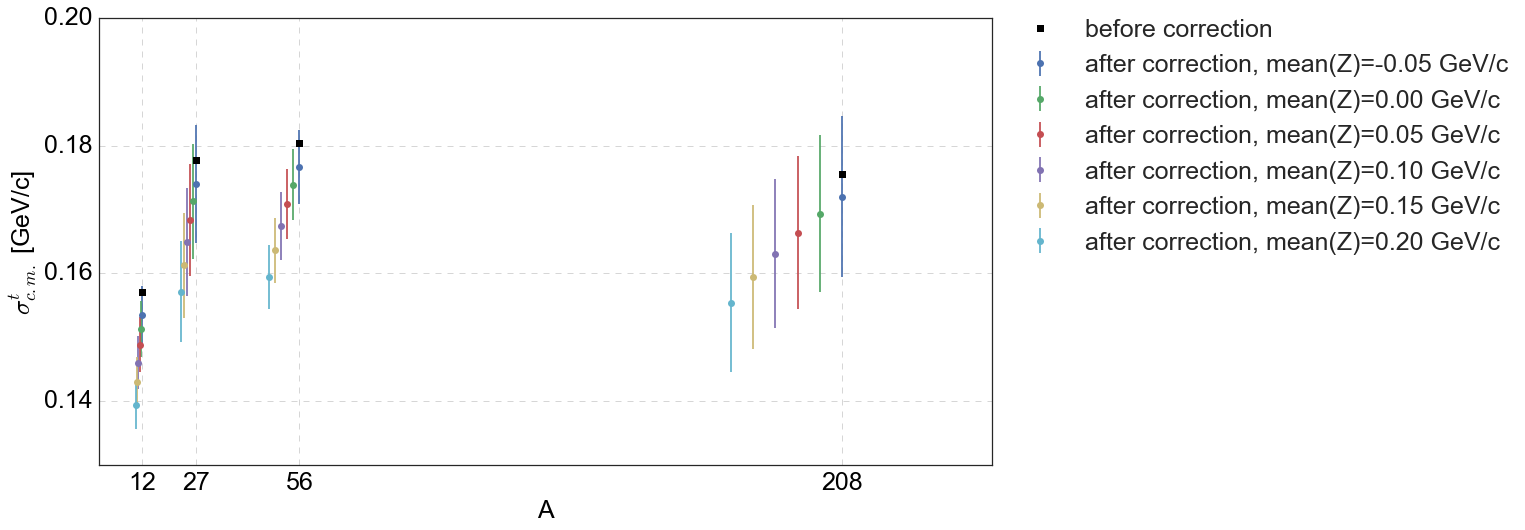

In [29]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
plt.plot(cm_pars_with_correction['A'],cm_pars_with_correction['sigma_t'],'s',color='black',label='before correction')
for i,(meanZ) in enumerate(meanZarr):
    name = 'mean(Z)=%.2f'%meanZ
    ax.errorbar(x=cm_pars_with_correction['A']*(1-0.03*i)
                ,y=cm_pars_with_correction['sigma_t_corrected'+'_'+name]
                ,yerr=cm_pars_with_correction['sigma_tErr_corrected'+'_'+name]
                ,fmt='o',label='after correction, '+name+' GeV/c')

set_axes(ax,'A','$\\sigma_{c.m.}^{t}$ [GeV/c]')
ax.xaxis.set_ticks([12,27,56,208]);ax.yaxis.set_ticks([0.14,0.16,0.18,0.2]);
ax.grid(linestyle='--',alpha=0.8)
ax.legend(bbox_to_anchor=(1,1.05),fontsize=25,loc=2)